In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import pickle
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

In [4]:
# All plot title size set to 18
plt.rcParams['axes.titlesize'] = 18
# All plot label size set to 16
plt.rcParams['axes.labelsize'] = 16

## Exploratory Data Analysis

In [5]:
cc_df = pd.read_csv('AnonymousBank/July1999.txt', sep='\t')

cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39022 entries, 0 to 39021
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   vru+line     39022 non-null  object
 1   call_id      39022 non-null  int64 
 2   customer_id  39022 non-null  int64 
 3   priority     39022 non-null  object
 4   type         39022 non-null  object
 5   date         39022 non-null  object
 6   vru_entry    39022 non-null  object
 7   vru_exit     39022 non-null  object
 8   vru_time     39022 non-null  object
 9   q_start      39022 non-null  object
 10  q_exit       39022 non-null  object
 11  q_time       39022 non-null  object
 12  outcome      39022 non-null  object
 13  ser_start    39022 non-null  object
 14  ser_exit     39022 non-null  object
 15  ser_time     39022 non-null  object
 16  server       39017 non-null  object
dtypes: int64(2), object(15)
memory usage: 5.1+ MB


C:\Users\irfan\AppData\Local\Temp\ipykernel_24624\174240284.py:1: DtypeWarning: Columns (3,5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  cc_df = pd.read_csv('AnonymousBank/July1999.txt', sep='\t')


In [6]:
# Display the first few rows of the DataFrame
cc_df.head()

,vru+line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server
0,AA0101,41886,0,0,PS,990701,0:26:17,0:26:27,10,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER
1,AA0101,41887,0,0,NW,990701,6:58:10,6:58:20,10,6:58:20,6:59:08,48,AGENT,6:59:07,6:59:15,8,MORIAH
2,AA0101,41888,0,0,PS,990701,7:30:27,7:30:35,8,0:00:00,0:00:00,0,AGENT,7:30:35,7:34:16,221,MORIAH
3,AA0101,41889,22800312,2,PS,990701,7:49:32,7:49:37,5,7:49:37,7:50:27,50,AGENT,7:50:26,7:51:48,82,ANAT
4,AA0101,41890,0,0,PS,990701,8:03:56,8:04:08,12,0:00:00,0:00:00,0,AGENT,8:04:07,8:05:25,78,KAZAV


In [7]:
# Check broken parsing
# Check if any 'type' values are not 2 characters long
cc_df[cc_df['type'].str.len() != 2]

,vru+line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server
9142,AA0108,3364,0,0 TT,990717,2:17:57,2:18:09,12,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,NaN
9236,AA0108,3458,0,0 TT,990729,9:16:11,9:16:27,16,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,NaN
12078,AA0111,3590,0,0 TT,990703,13:56:19,13:56:22,3,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,NaN
15210,AA0116,6178,0,0 IN,990706,12:02:11,12:02:34,23,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,NaN
15388,AA0116,6357,0,0 IN,990719,19:26:18,19:26:24,6,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,NaN


In [8]:
# Since these have 'HANG' outcome, let's just drop these rows
cc_df = cc_df[cc_df['type'].str.len() == 2]

cc_df[cc_df['type'].str.len() != 2]

,vru+line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server


In [ ]:
# Change date column types to datetime
cc_df['date'] = pd.to_datetime(cc_df['date'], format='%y%m%d')

# Change time columns to datetime
cc_df['vru_entry'] = pd.to_datetime(cc_df['date'].astype(str) + ' ' + cc_df['vru_entry'], format='%Y-%m-%d %H:%M:%S')
cc_df['vru_exit'] = pd.to_datetime(cc_df['date'].astype(str) + ' ' + cc_df['vru_exit'], format='%Y-%m-%d %H:%M:%S')
cc_df['ser_start'] = pd.to_datetime(cc_df['date'].astype(str) + ' ' + cc_df['ser_start'], format='%Y-%m-%d %H:%M:%S')
cc_df['ser_exit'] = pd.to_datetime(cc_df['date'].astype(str) + ' ' + cc_df['ser_exit'], format='%Y-%m-%d %H:%M:%S')

# Change number columns to numeric
cc_df['vru_time'] = pd.to_numeric(cc_df['vru_time'], errors='coerce')
cc_df['q_time'] = pd.to_numeric(cc_df['q_time'], errors='coerce')
cc_df['ser_time'] = pd.to_numeric(cc_df['ser_time'], errors='coerce')

# Only keep rows with 'AGENT' in the 'outcome' column
cc_df = cc_df[cc_df['outcome'] == 'AGENT']

# Remove calls coming later than midnight and earlier than 7 AM
cc_df = cc_df[(cc_df['vru_entry'].dt.hour >= 7) & (cc_df['vru_entry'].dt.hour < 24)]

# Remove calls with 'NO_SERVER' server
cc_df = cc_df[cc_df['server'] != 'NO_SERVER']

# Drop unnecessary columns
cc_df = cc_df.drop(columns=['vru+line', 'customer_id', 'priority'])

# Display the first few rows of the cleaned DataFrame
cc_df.head()

,call_id,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server
2,41888,PS,1999-07-01,1999-07-01 07:30:27,1999-07-01 07:30:35,8,0:00:00,0:00:00,0,AGENT,1999-07-01 07:30:35,1999-07-01 07:34:16,221,MORIAH
3,41889,PS,1999-07-01,1999-07-01 07:49:32,1999-07-01 07:49:37,5,7:49:37,7:50:27,50,AGENT,1999-07-01 07:50:26,1999-07-01 07:51:48,82,ANAT
4,41890,PS,1999-07-01,1999-07-01 08:03:56,1999-07-01 08:04:08,12,0:00:00,0:00:00,0,AGENT,1999-07-01 08:04:07,1999-07-01 08:05:25,78,KAZAV
5,41891,PS,1999-07-01,1999-07-01 08:22:12,1999-07-01 08:22:25,13,0:00:00,0:00:00,0,AGENT,1999-07-01 08:22:24,1999-07-01 08:32:12,588,YIFAT
6,41892,PS,1999-07-01,1999-07-01 08:32:24,1999-07-01 08:32:29,5,8:32:29,8:32:45,16,AGENT,1999-07-01 08:32:44,1999-07-01 08:33:39,55,TOVA


In [10]:
# Count the number of row after cleaning
print(f"Number of rows after cleaning: {len(cc_df)}")

Number of rows after cleaning: 29179


In [11]:
# Count the number of unique agents
cc_df['server'].nunique()

25

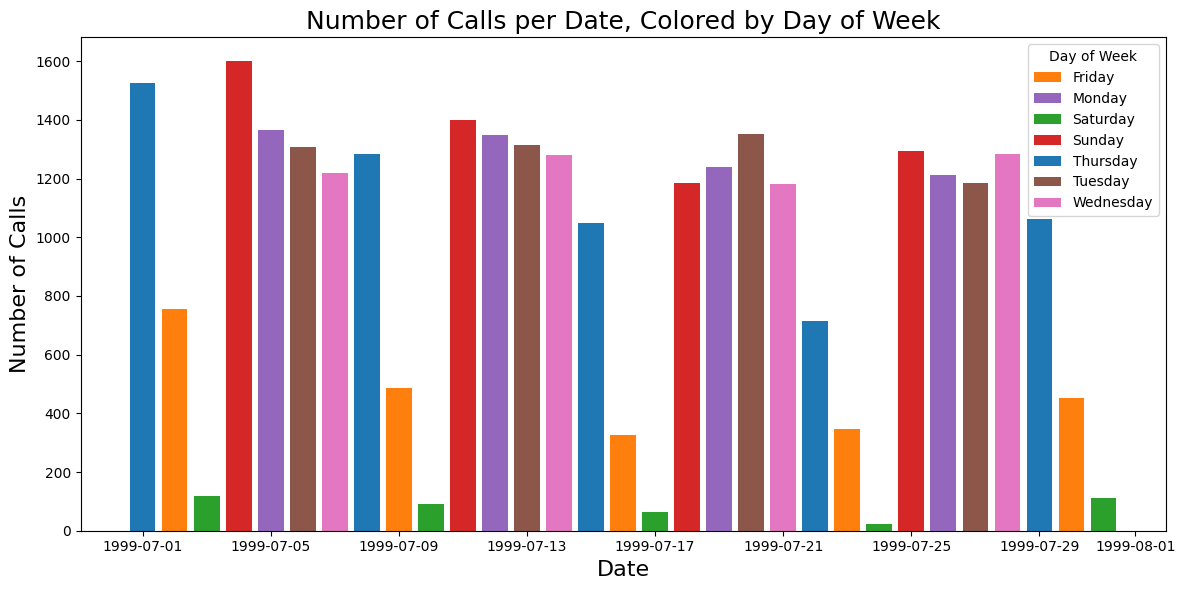

In [12]:
# Count the rows for each date

# Add day of week
cc_df['day_of_week'] = cc_df['date'].dt.day_name()
# Count the rows for each date and color by day of week
date_counts = cc_df.groupby(['date', 'day_of_week']).size().reset_index(name='count')
day_colors = dict(zip(cc_df['day_of_week'].unique(), sns.color_palette('tab10', n_colors=cc_df['day_of_week'].nunique())))
plt.figure(figsize=(12, 6))
for day, group in date_counts.groupby('day_of_week'):
    plt.bar(group['date'], group['count'], color=day_colors[day], label=day)
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.title('Number of Calls per Date, Colored by Day of Week')
plt.legend(title='Day of Week')
plt.tight_layout()
plt.show()

In [13]:
# Lets analyse the one with highest number of calls, which is 1999-04-11
highest_calls_date = date_counts.loc[date_counts['count'].idxmax(), 'date']
highest_calls_df = cc_df[cc_df['date'] == highest_calls_date]

highest_calls_df

,call_id,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,day_of_week
131,42020,PS,1999-07-04,1999-07-04 07:10:15,1999-07-04 07:10:29,14,0:00:00,0:00:00,0,AGENT,1999-07-04 07:10:28,1999-07-04 07:12:41,133,AVI,Sunday
132,42021,PS,1999-07-04,1999-07-04 07:29:57,1999-07-04 07:30:06,9,0:00:00,0:00:00,0,AGENT,1999-07-04 07:30:05,1999-07-04 07:34:32,267,YIFAT,Sunday
134,42023,PS,1999-07-04,1999-07-04 08:08:12,1999-07-04 08:08:19,7,8:08:19,8:08:40,21,AGENT,1999-07-04 08:08:39,1999-07-04 08:13:10,271,VICKY,Sunday
135,42024,PS,1999-07-04,1999-07-04 08:16:34,1999-07-04 08:16:41,7,8:16:41,8:17:06,25,AGENT,1999-07-04 08:17:04,1999-07-04 08:20:10,186,KAZAV,Sunday
137,42026,PS,1999-07-04,1999-07-04 08:36:44,1999-07-04 08:36:50,6,8:36:50,8:37:25,35,AGENT,1999-07-04 08:37:23,1999-07-04 08:39:37,134,AVI,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38181,7055,IN,1999-07-04,1999-07-04 17:26:08,1999-07-04 17:26:17,9,17:26:17,17:26:35,18,AGENT,1999-07-04 17:26:34,1999-07-04 17:30:13,219,YITZ,Sunday
38182,7056,PS,1999-07-04,1999-07-04 17:44:52,1999-07-04 17:44:58,6,17:44:58,17:48:57,239,AGENT,1999-07-04 17:48:56,1999-07-04 17:48:59,3,MORIAH,Sunday
38183,7057,IN,1999-07-04,1999-07-04 18:56:52,1999-07-04 18:57:01,9,18:57:01,19:04:14,433,AGENT,1999-07-04 19:04:14,1999-07-04 19:04:54,40,TOVA,Sunday
38184,7058,IN,1999-07-04,1999-07-04 19:36:13,1999-07-04 19:36:27,14,0:00:00,0:00:00,0,AGENT,1999-07-04 19:36:26,1999-07-04 19:43:48,442,TOVA,Sunday


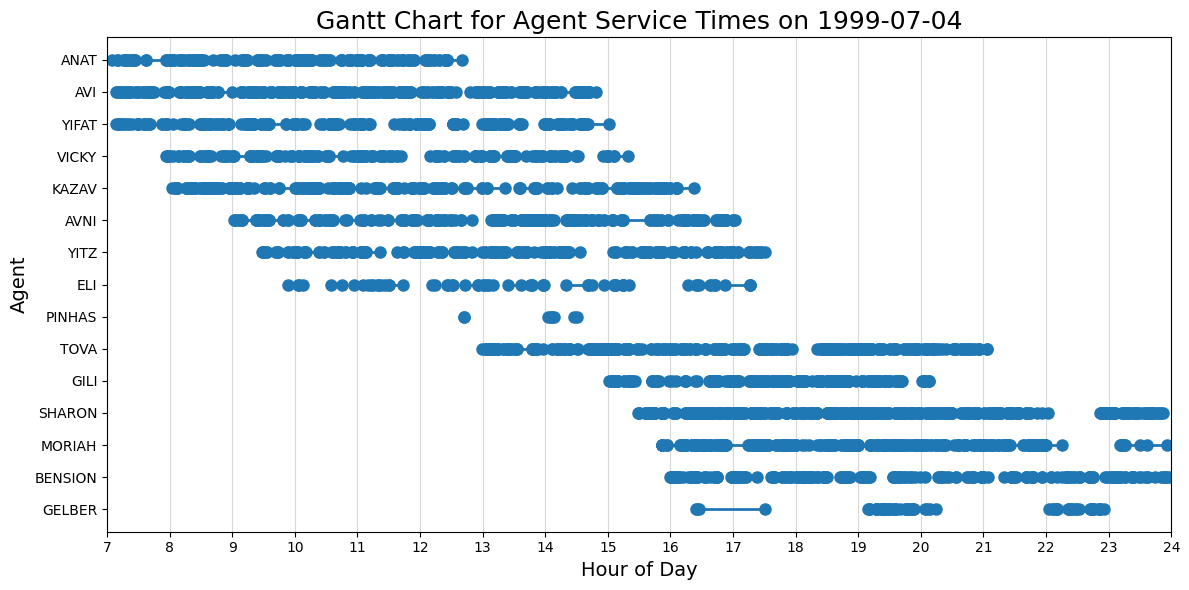

In [14]:
# Remove calls in service later than midnight and earlier than 7 AM
highest_calls_df = highest_calls_df[(highest_calls_df['ser_exit'].dt.hour >= 7) & (highest_calls_df['ser_exit'].dt.hour < 24)]

# Gantt chart for agents service times
# Assign a y position for each agent
agent_order = highest_calls_df['server'].unique()
# Sort agents by the first service start time
agent_order = highest_calls_df.groupby('server')['ser_start'].min().sort_values(ascending=False).index.to_numpy()
agent_to_y = {agent: i for i, agent in enumerate(agent_order)}

plt.figure(figsize=(12, 6))
for _, row in highest_calls_df.iterrows():
    y = agent_to_y[row['server']]
    x_start = row['ser_start'].hour + row['ser_start'].minute / 60 + row['ser_start'].second / 3600
    x_end = row['ser_exit'].hour + row['ser_exit'].minute / 60 + row['ser_exit'].second / 3600
    plt.hlines(y, x_start, x_end, color='tab:blue', linewidth=2)
    plt.plot([x_start, x_end], [y, y], 'o', color='tab:blue', markersize=8)  # blue dots

plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Agent', fontsize=14)
plt.title(f'Gantt Chart for Agent Service Times on {highest_calls_date.date()}', fontsize=18)
plt.xlim(7, 24)
plt.xticks(range(7, 25))
plt.yticks(range(len(agent_order)), agent_order)
plt.grid(True, axis='x', alpha=0.5)
plt.tight_layout()
plt.show()

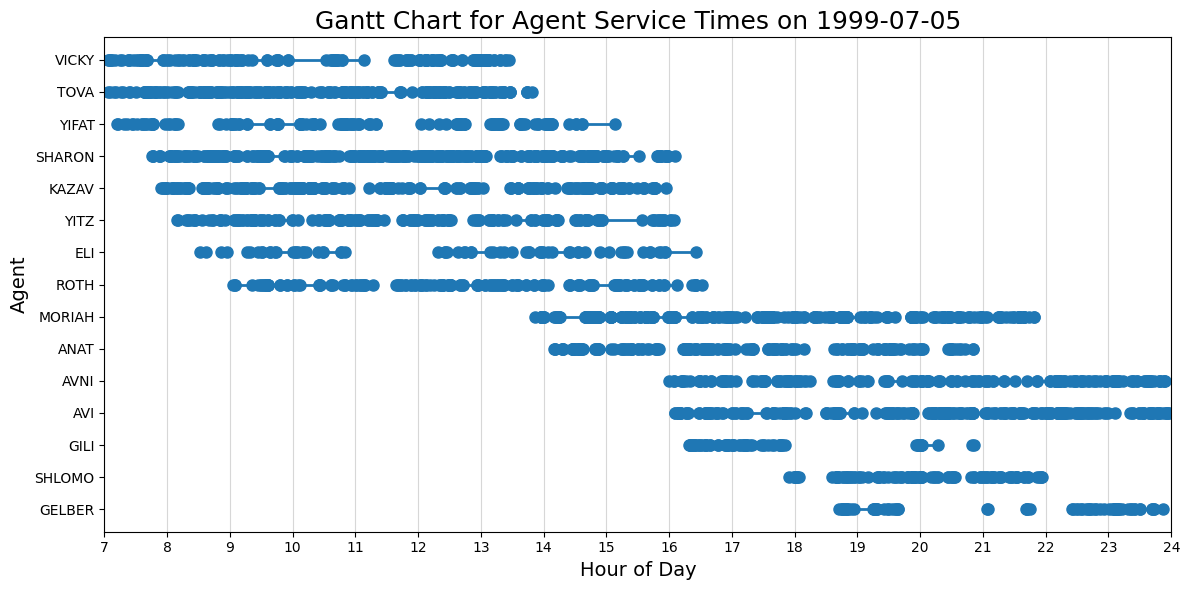

In [15]:
# Create gantt chart for the next day
next_day = highest_calls_date + pd.Timedelta(days=1)
next_day_df = cc_df[cc_df['date'] == next_day]

# Remove calls in service later than midnight and earlier than 7 AM
next_day_df = next_day_df[(next_day_df['ser_exit'].dt.hour >= 7) & (next_day_df['ser_exit'].dt.hour < 24)]

# Gantt chart for agents service times
# Assign a y position for each agent
agent_order_next = next_day_df['server'].unique()
agent_order_next = next_day_df.groupby('server')['ser_start'].min().sort_values(ascending=False).index.to_numpy()
agent_to_y_next = {agent: i for i, agent in enumerate(agent_order_next)}

plt.figure(figsize=(12, 6))
for _, row in next_day_df.iterrows():
    y = agent_to_y_next[row['server']]
    x_start = row['ser_start'].hour + row['ser_start'].minute / 60 + row['ser_start'].second / 3600
    x_end = row['ser_exit'].hour + row['ser_exit'].minute / 60 + row['ser_exit'].second / 3600
    plt.hlines(y, x_start, x_end, color='tab:blue', linewidth=2)
    plt.plot([x_start, x_end], [y, y], 'o', color='tab:blue', markersize=8)  # blue dots

plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Agent', fontsize=14)
plt.title(f'Gantt Chart for Agent Service Times on {next_day.date()}', fontsize=18)
plt.xlim(7, 24)
plt.xticks(range(7, 25))
plt.yticks(range(len(agent_order_next)), agent_order_next)
plt.grid(True, axis='x', alpha=0.5)
plt.tight_layout()
plt.show()

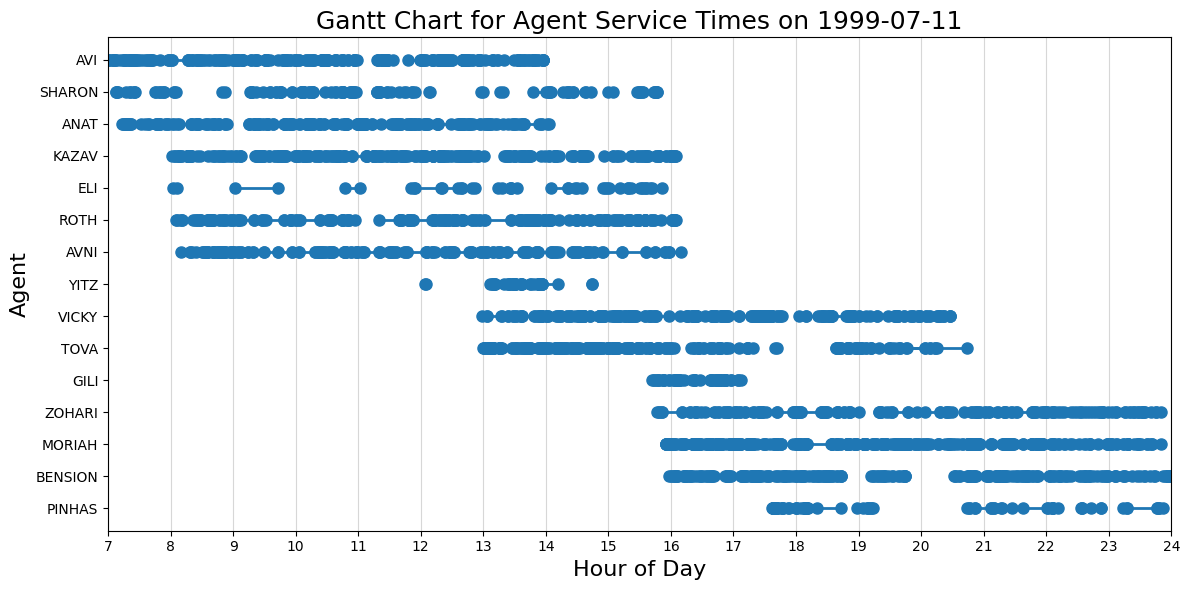

In [16]:
# Gantt chart for a week after the highest calls date
week_after_date = highest_calls_date + pd.Timedelta(days=7)
week_after_df = cc_df[(cc_df['date'] == week_after_date)]

# Remove calls in service later than midnight and earlier than 7 AM
week_after_df = week_after_df[(week_after_df['ser_exit'].dt.hour >= 7) & (week_after_df['ser_exit'].dt.hour < 24)]

# Gantt chart for agents service times
# Assign a y position for each agent
agent_order_week = week_after_df['server'].unique()
agent_order_week = week_after_df.groupby('server')['ser_start'].min().sort_values(ascending=False).index.to_numpy()
agent_to_y_week = {agent: i for i, agent in enumerate(agent_order_week)}

plt.figure(figsize=(12, 6))
for _, row in week_after_df.iterrows():
    y = agent_to_y_week[row['server']]
    x_start = row['ser_start'].hour + row['ser_start'].minute / 60 + row['ser_start'].second / 3600
    x_end = row['ser_exit'].hour + row['ser_exit'].minute / 60 + row['ser_exit'].second / 3600
    plt.hlines(y, x_start, x_end, color='tab:blue', linewidth=2)
    plt.plot([x_start, x_end], [y, y], 'o', color='tab:blue', markersize=8)  # blue dots

plt.xlabel('Hour of Day')
plt.ylabel('Agent')
plt.title(f'Gantt Chart for Agent Service Times on {week_after_date.date()}')
plt.xlim(7, 24)
plt.xticks(range(7, 25))
plt.yticks(range(len(agent_order_week)), agent_order_week)
plt.grid(True, axis='x', alpha=0.5)
plt.tight_layout()
plt.show()

### So different agents work at different times. But there are always 8 of them at one time

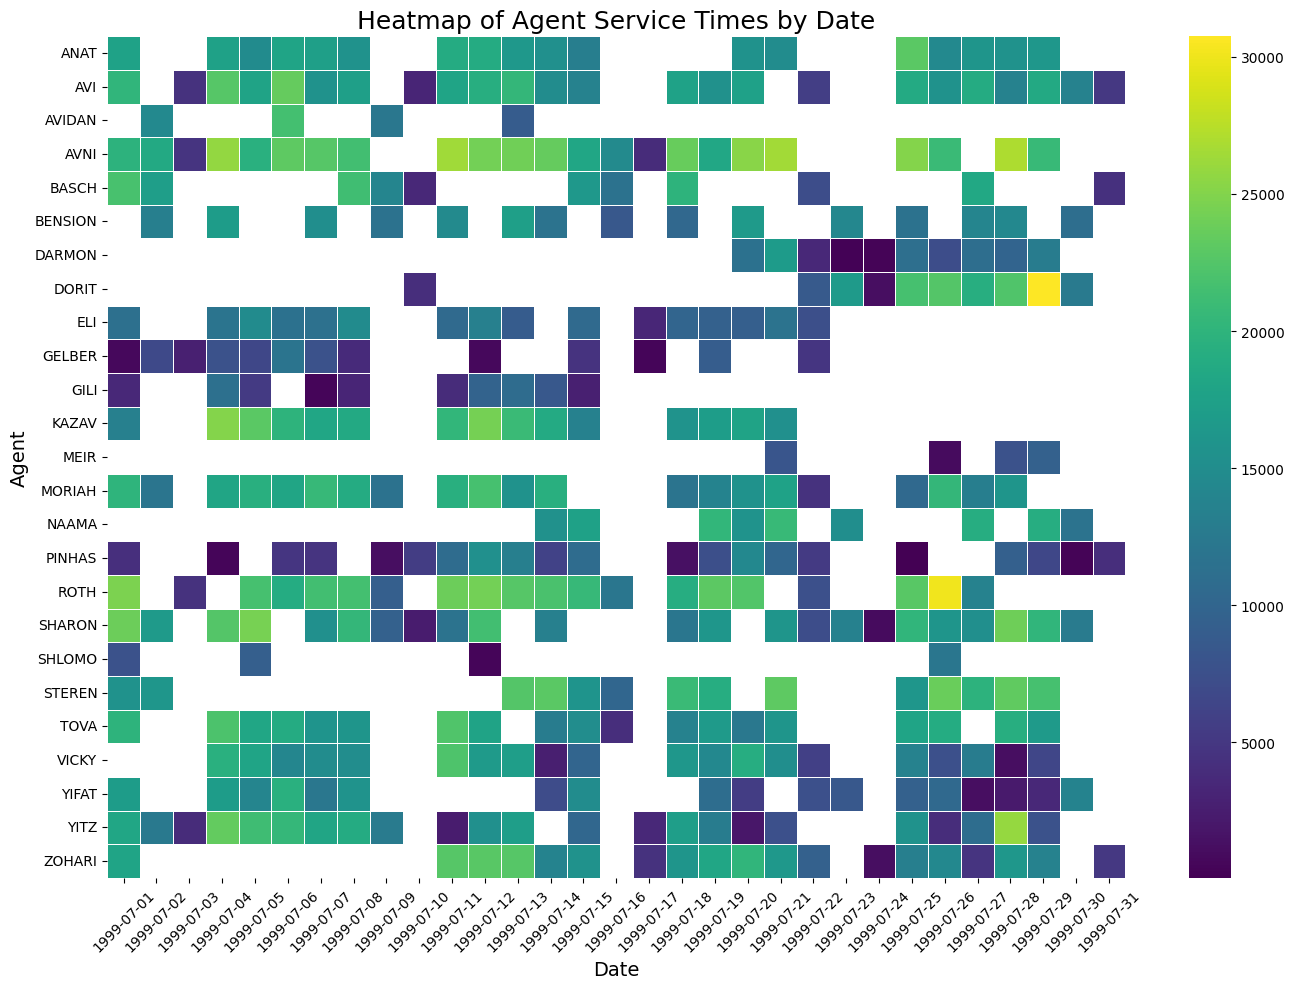

In [17]:
# Ensure 'date' is string before pivoting, for correct heatmap axis labeling
cc_df['date_str'] = cc_df['date'].astype(str)
heatmap_data = cc_df.pivot_table(
    index='server',
    columns='date_str',
    values='ser_time',
    aggfunc='sum'
)

# Now plot, with string labels as columns
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap='viridis', annot=False, fmt='.1f', linewidths=.5)
plt.title('Heatmap of Agent Service Times by Date', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Agent', fontsize=14)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

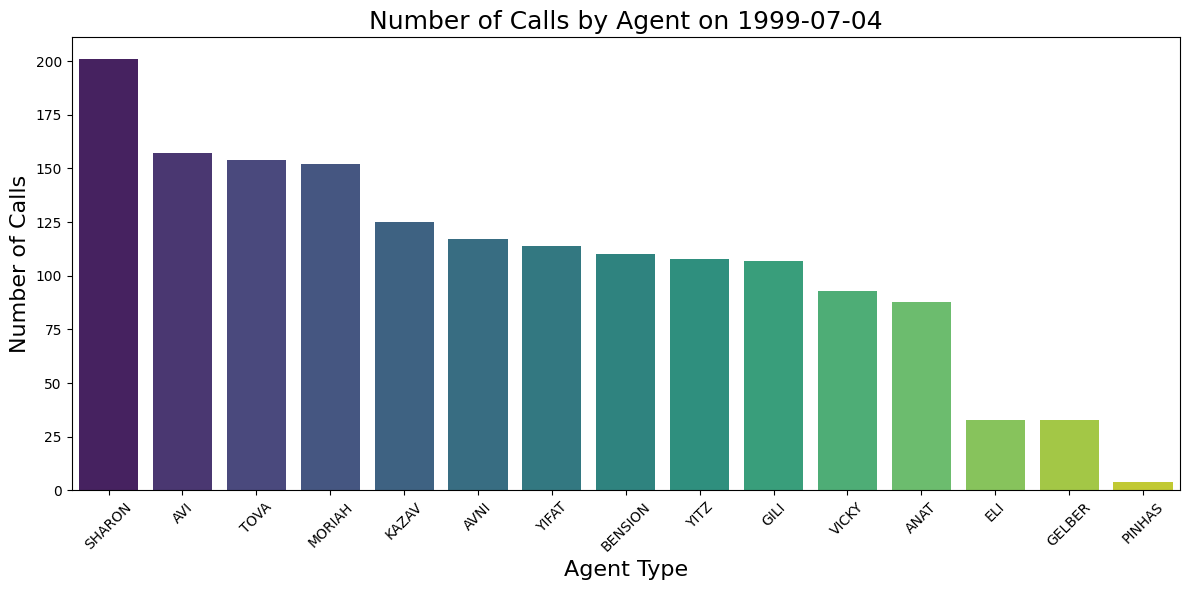

In [18]:
# Check the number of calls performed by each agent
agent_counts = highest_calls_df['server'].value_counts().reset_index()
agent_counts.columns = ['server', 'count']
plt.figure(figsize=(12, 6))
sns.barplot(x='server', y='count', data=agent_counts, palette='viridis', hue='server')
plt.xlabel('Agent Type')
plt.ylabel('Number of Calls')
plt.title(f'Number of Calls by Agent on {highest_calls_date.strftime("%Y-%m-%d")}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


No assignment pattern so we have to split manually or do clustering

### Let's split the call types into two types (regular and specific)

In [19]:
# Check rows with zero service time
cc_df[cc_df['ser_time'] == 0]

,call_id,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,day_of_week,date_str
218,42107,PS,1999-07-04,1999-07-04 20:02:31,1999-07-04 20:02:36,5,20:02:36,20:03:25,49,AGENT,1999-07-04 20:03:24,1999-07-04 20:03:24,0,GILI,Sunday,1999-07-04
1294,43200,NE,1999-07-27,1999-07-27 09:34:35,1999-07-27 09:34:48,13,0:00:00,0:00:00,0,AGENT,1999-07-27 00:00:00,1999-07-27 00:00:00,0,ZOHARI,Tuesday,1999-07-27
1456,43363,NE,1999-07-31,1999-07-31 22:37:40,1999-07-31 22:37:45,5,22:37:45,22:38:05,20,AGENT,1999-07-31 22:38:04,1999-07-31 22:38:04,0,AVI,Saturday,1999-07-31
2904,38882,PS,1999-07-31,1999-07-31 22:17:33,1999-07-31 22:17:39,6,22:17:39,22:20:42,183,AGENT,1999-07-31 22:20:42,1999-07-31 22:20:42,0,AVI,Saturday,1999-07-31
2937,33049,PS,1999-07-01,1999-07-01 13:50:30,1999-07-01 13:50:35,5,13:50:35,13:51:29,54,AGENT,1999-07-01 00:00:00,1999-07-01 00:00:00,0,YIFAT,Thursday,1999-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36504,23457,NE,1999-07-26,1999-07-26 10:11:52,1999-07-26 10:12:02,10,0:00:00,0:00:00,0,AGENT,1999-07-26 00:00:00,1999-07-26 00:00:00,0,ZOHARI,Monday,1999-07-26
36706,23663,PS,1999-07-28,1999-07-28 16:12:59,1999-07-28 16:13:05,6,16:13:05,16:13:23,18,AGENT,1999-07-28 16:13:23,1999-07-28 16:13:23,0,BENSION,Wednesday,1999-07-28
38000,22833,PS,1999-07-29,1999-07-29 09:38:48,1999-07-29 09:38:53,5,9:38:53,9:39:45,52,AGENT,1999-07-29 09:39:44,1999-07-29 09:39:44,0,AVI,Thursday,1999-07-29
38098,22931,NE,1999-07-30,1999-07-30 10:24:10,1999-07-30 10:24:17,7,10:24:17,10:25:27,70,AGENT,1999-07-30 10:25:26,1999-07-30 10:25:26,0,AVI,Friday,1999-07-30


In [20]:
# Remove rows with zero service time
cc_df = cc_df[cc_df['ser_time'] > 0]

In [21]:
cc_df['ser_time'].describe()

count    29047.000000
mean       186.628602
std        302.916378
min          1.000000
25%         61.000000
50%        116.000000
75%        220.000000
max      25561.000000
Name: ser_time, dtype: float64

In [22]:
# Group the data by type and calculate the number of calls per type
cc_df_grouped = cc_df.groupby('type')

cc_df_grouped_count = cc_df_grouped.size().reset_index(name='count')
cc_df_grouped_count = cc_df_grouped_count.sort_values(by='count', ascending=False)

# Display the counts of each call type
cc_df_grouped_count

,type,count
4,PS,21370
2,NW,3118
1,NE,3025
5,TT,826
0,IN,619
3,PE,89


In [23]:
# Display the first few rows of the grouped DataFrame
cc_df_grouped.head()

,call_id,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,day_of_week,date_str
2,41888,PS,1999-07-01,1999-07-01 07:30:27,1999-07-01 07:30:35,8,0:00:00,0:00:00,0,AGENT,1999-07-01 07:30:35,1999-07-01 07:34:16,221,MORIAH,Thursday,1999-07-01
3,41889,PS,1999-07-01,1999-07-01 07:49:32,1999-07-01 07:49:37,5,7:49:37,7:50:27,50,AGENT,1999-07-01 07:50:26,1999-07-01 07:51:48,82,ANAT,Thursday,1999-07-01
4,41890,PS,1999-07-01,1999-07-01 08:03:56,1999-07-01 08:04:08,12,0:00:00,0:00:00,0,AGENT,1999-07-01 08:04:07,1999-07-01 08:05:25,78,KAZAV,Thursday,1999-07-01
5,41891,PS,1999-07-01,1999-07-01 08:22:12,1999-07-01 08:22:25,13,0:00:00,0:00:00,0,AGENT,1999-07-01 08:22:24,1999-07-01 08:32:12,588,YIFAT,Thursday,1999-07-01
6,41892,PS,1999-07-01,1999-07-01 08:32:24,1999-07-01 08:32:29,5,8:32:29,8:32:45,16,AGENT,1999-07-01 08:32:44,1999-07-01 08:33:39,55,TOVA,Thursday,1999-07-01
12,41898,NE,1999-07-01,1999-07-01 10:57:26,1999-07-01 10:57:33,7,10:57:33,10:59:26,113,AGENT,1999-07-01 10:59:26,1999-07-01 11:06:11,405,KAZAV,Thursday,1999-07-01
24,41910,NE,1999-07-01,1999-07-01 12:31:01,1999-07-01 12:31:07,6,12:31:07,12:32:45,98,AGENT,1999-07-01 12:32:44,1999-07-01 12:33:30,46,SHARON,Thursday,1999-07-01
25,41911,NE,1999-07-01,1999-07-01 12:40:21,1999-07-01 12:40:26,5,12:40:26,12:40:42,16,AGENT,1999-07-01 12:40:41,1999-07-01 12:44:20,219,SHARON,Thursday,1999-07-01
29,41915,NE,1999-07-01,1999-07-01 13:17:05,1999-07-01 13:17:11,6,13:17:11,13:17:30,19,AGENT,1999-07-01 13:17:28,1999-07-01 13:18:01,33,BASCH,Thursday,1999-07-01
30,41916,NE,1999-07-01,1999-07-01 13:30:13,1999-07-01 13:30:19,6,13:30:19,13:30:53,34,AGENT,1999-07-01 13:30:52,1999-07-01 13:32:59,127,ANAT,Thursday,1999-07-01


Text(0.5, 1.0, 'Number of Calls per Type')

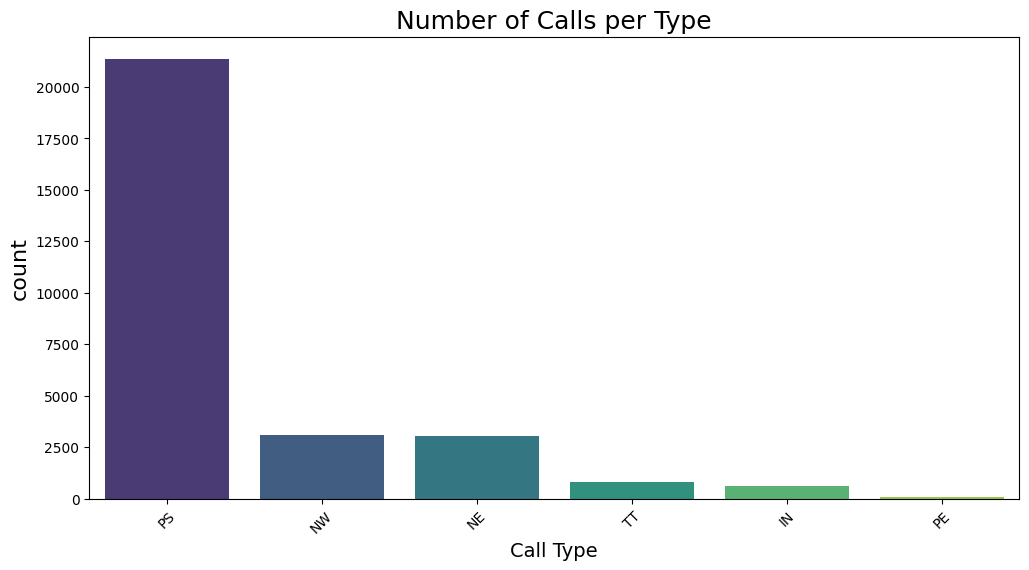

In [24]:
# Plot the number of calls per type
plt.figure(figsize=(12, 6))
sns.barplot(x='type', y='count', data=cc_df_grouped_count, palette='viridis', hue='type')
plt.xlabel('Call Type', fontsize=14)
plt.xticks(rotation=45)
plt.title('Number of Calls per Type', fontsize=18)

In [25]:
# Describe service times of each type dataframes
cc_df_grouped['ser_time'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
IN,619.0,322.930533,1206.944704,1.0,69.5,130.0,249.0,25561.0
NE,3025.0,245.162314,298.101258,1.0,73.0,159.0,301.0,3868.0
NW,3118.0,130.663246,179.385981,1.0,41.0,77.0,153.0,2864.0
PE,89.0,331.887640,398.862486,2.0,142.0,236.0,415.0,3170.0
PS,21370.0,184.356715,242.067099,1.0,65.0,119.0,220.0,12510.0
TT,826.0,124.506053,335.711403,2.0,11.0,48.5,137.0,6889.0


In [26]:
# Check the rows with the longest service times for each type
longest_service_times = cc_df.loc[cc_df_grouped['ser_time'].idxmax()]
longest_service_times

,call_id,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,day_of_week,date_str
38889,7765,IN,1999-07-28,1999-07-28 15:14:06,1999-07-28 15:14:16,10,15:14:16,15:17:02,166,AGENT,1999-07-28 15:17:01,1999-07-28 22:23:02,25561,YITZ,Wednesday,1999-07-28
29944,42728,NE,1999-07-08,1999-07-08 10:43:21,1999-07-08 10:43:40,19,0:00:00,0:00:00,0,AGENT,1999-07-08 10:43:39,1999-07-08 11:48:07,3868,ELI,Thursday,1999-07-08
16387,43020,NW,1999-07-28,1999-07-28 15:43:03,1999-07-28 15:43:12,9,15:43:12,15:45:43,151,AGENT,1999-07-28 15:45:42,1999-07-28 16:33:26,2864,PINHAS,Wednesday,1999-07-28
8524,44346,PE,1999-07-27,1999-07-27 23:03:05,1999-07-27 23:03:09,4,23:03:09,23:04:53,104,AGENT,1999-07-27 23:04:51,1999-07-27 23:57:41,3170,YITZ,Tuesday,1999-07-27
35126,24221,PS,1999-07-29,1999-07-29 20:29:28,1999-07-29 20:29:34,6,20:29:34,20:30:27,53,AGENT,1999-07-29 20:30:27,1999-07-29 23:58:57,12510,DORIT,Thursday,1999-07-29
9214,3436,TT,1999-07-26,1999-07-26 19:24:35,1999-07-26 19:24:37,2,0:00:00,0:00:00,0,AGENT,1999-07-26 19:24:36,1999-07-26 21:19:25,6889,SHLOMO,Monday,1999-07-26


I think 7 hours of service is unrealistic, lets remove them

In [27]:
# Remove one call with excessive service time
cc_df = cc_df[cc_df['ser_time'] < 20000]

# Re-group after filtering
cc_df_grouped = cc_df.groupby('type')

# Check again
longest_service_times = cc_df.loc[cc_df_grouped['ser_time'].idxmax()]
longest_service_times

,call_id,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,day_of_week,date_str
15638,6607,IN,1999-07-30,1999-07-30 11:33:49,1999-07-30 11:33:59,10,11:33:59,11:34:17,18,AGENT,1999-07-30 11:34:16,1999-07-30 15:00:29,12373,YIFAT,Friday,1999-07-30
29944,42728,NE,1999-07-08,1999-07-08 10:43:21,1999-07-08 10:43:40,19,0:00:00,0:00:00,0,AGENT,1999-07-08 10:43:39,1999-07-08 11:48:07,3868,ELI,Thursday,1999-07-08
16387,43020,NW,1999-07-28,1999-07-28 15:43:03,1999-07-28 15:43:12,9,15:43:12,15:45:43,151,AGENT,1999-07-28 15:45:42,1999-07-28 16:33:26,2864,PINHAS,Wednesday,1999-07-28
8524,44346,PE,1999-07-27,1999-07-27 23:03:05,1999-07-27 23:03:09,4,23:03:09,23:04:53,104,AGENT,1999-07-27 23:04:51,1999-07-27 23:57:41,3170,YITZ,Tuesday,1999-07-27
35126,24221,PS,1999-07-29,1999-07-29 20:29:28,1999-07-29 20:29:34,6,20:29:34,20:30:27,53,AGENT,1999-07-29 20:30:27,1999-07-29 23:58:57,12510,DORIT,Thursday,1999-07-29
9214,3436,TT,1999-07-26,1999-07-26 19:24:35,1999-07-26 19:24:37,2,0:00:00,0:00:00,0,AGENT,1999-07-26 19:24:36,1999-07-26 21:19:25,6889,SHLOMO,Monday,1999-07-26


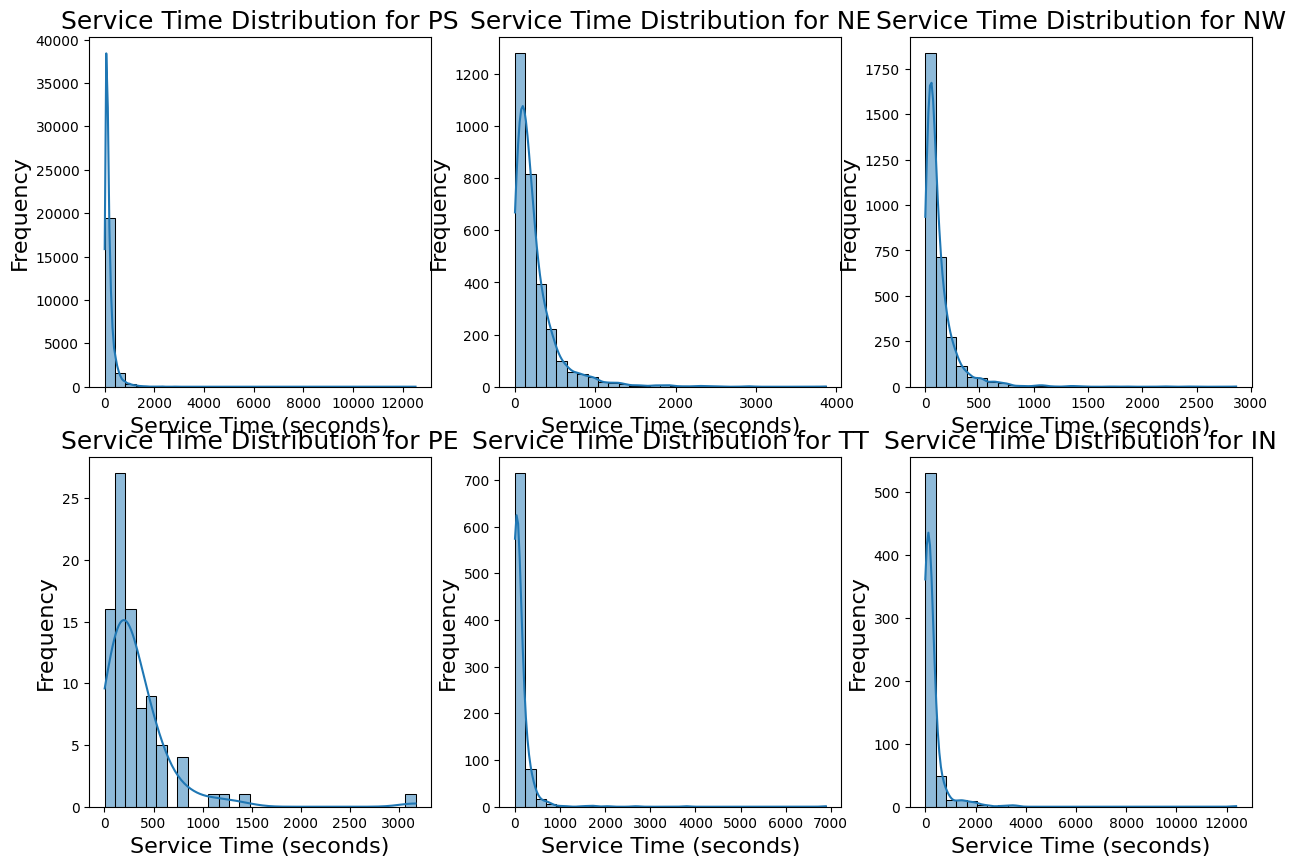

In [28]:
# Plot histogram of service times for each call type
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()
for i, call_type in enumerate(cc_df['type'].unique()):
    sns.histplot(cc_df[cc_df['type'] == call_type]['ser_time'], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Service Time Distribution for {call_type}')
    axes[i].set_xlabel('Service Time (seconds)')
    axes[i].set_ylabel('Frequency')

In [29]:
# QQ plot against exponential distribution
def qq_plot_exp(data, title):
    stats.probplot(data, dist="expon", plot=plt)
    plt.title(title)
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    
# QQ plot against lognormal distribution
def qq_plot_lognorm(data, title):
    shape, loc, scale = stats.lognorm.fit(data, floc=0)
    stats.probplot(data, dist="lognorm", sparams=(shape, loc, scale), plot=plt)
    plt.title(title)
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')

In [30]:
def ks_test_distributions_df(data):
    results = {}

    # Exponential: fit with data mean
    exp_params = (data.mean(),)
    d_exp, p_exp = stats.kstest(data, 'expon', args=exp_params)
    results['exponential'] = {'D-statistic': d_exp, 'p-value': p_exp}

    # Gamma: fit distribution to data
    gamma_params = stats.gamma.fit(data)
    d_gamma, p_gamma = stats.kstest(data, 'gamma', args=gamma_params)
    results['gamma'] = {'D-statistic': d_gamma, 'p-value': p_gamma}

    # Lognormal: fit distribution to data
    lognorm_params = stats.lognorm.fit(data)
    d_lognorm, p_lognorm = stats.kstest(data, 'lognorm', args=lognorm_params)
    results['lognormal'] = {'D-statistic': d_lognorm, 'p-value': p_lognorm}
    
    # Weibull: fit distribution to data
    weibull_params = stats.weibull_min.fit(data)
    d_weibull, p_weibull = stats.kstest(data, 'weibull_min', args=weibull_params)
    results['weibull'] = {'D-statistic': d_weibull, 'p-value': p_weibull}

    # Create DataFrame from results
    df = pd.DataFrame(results).T
    df['reject_null'] = df['p-value'] < 0.05

    # Find best fitting distribution
    best_fit = df['p-value'].idxmax()
    df['best_fit'] = best_fit
    return df


In [31]:
# Group the other call into one against 'PS'
# Because 'PS' is general query, we will call it 'REGULAR'
cc_type_df = cc_df.copy()
cc_type_df['type_group'] = cc_type_df['type'].apply(lambda x: 'REGULAR' if x == 'PS' else 'SPECIFIC')

# Display the first few rows of the grouped DataFrame
cc_type_df.head()

,call_id,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,day_of_week,date_str,type_group
2,41888,PS,1999-07-01,1999-07-01 07:30:27,1999-07-01 07:30:35,8,0:00:00,0:00:00,0,AGENT,1999-07-01 07:30:35,1999-07-01 07:34:16,221,MORIAH,Thursday,1999-07-01,REGULAR
3,41889,PS,1999-07-01,1999-07-01 07:49:32,1999-07-01 07:49:37,5,7:49:37,7:50:27,50,AGENT,1999-07-01 07:50:26,1999-07-01 07:51:48,82,ANAT,Thursday,1999-07-01,REGULAR
4,41890,PS,1999-07-01,1999-07-01 08:03:56,1999-07-01 08:04:08,12,0:00:00,0:00:00,0,AGENT,1999-07-01 08:04:07,1999-07-01 08:05:25,78,KAZAV,Thursday,1999-07-01,REGULAR
5,41891,PS,1999-07-01,1999-07-01 08:22:12,1999-07-01 08:22:25,13,0:00:00,0:00:00,0,AGENT,1999-07-01 08:22:24,1999-07-01 08:32:12,588,YIFAT,Thursday,1999-07-01,REGULAR
6,41892,PS,1999-07-01,1999-07-01 08:32:24,1999-07-01 08:32:29,5,8:32:29,8:32:45,16,AGENT,1999-07-01 08:32:44,1999-07-01 08:33:39,55,TOVA,Thursday,1999-07-01,REGULAR


In [32]:
cc_type_df_grouped = cc_type_df.groupby('type_group')

cc_type_df_grouped['ser_time'].describe()

,count,mean,std,min,25%,50%,75%,max
type_group,,,,,,,,
REGULAR,21370.0,184.356715,242.067099,1.0,65.0,119.0,220.0,12510.0
SPECIFIC,7676.0,189.647863,316.541846,1.0,46.0,105.5,218.0,12373.0


### Now we need 2 agent groups from 25 agents. Lets see how each agent perform on REGULAR and SPECIFIC calls

### We will perform clustering to group them into two agent groups

In [33]:
# Calculate mean service time for each server and call type (REGULAR, SPECIFIC)
mean_ser_time = cc_type_df.groupby(['server', 'type_group'])['ser_time'].mean().unstack()
mean_ser_time = mean_ser_time.fillna(0)

mean_ser_time

type_group,REGULAR,SPECIFIC
server,,
ANAT,199.019017,180.872659
AVI,138.247344,120.717633
AVIDAN,188.343137,158.813559
AVNI,246.886092,170.300797
BASCH,189.517941,157.373272
BENSION,127.363563,97.798165
DARMON,275.068966,268.532468
DORIT,216.832812,192.779817
ELI,361.764706,433.777778


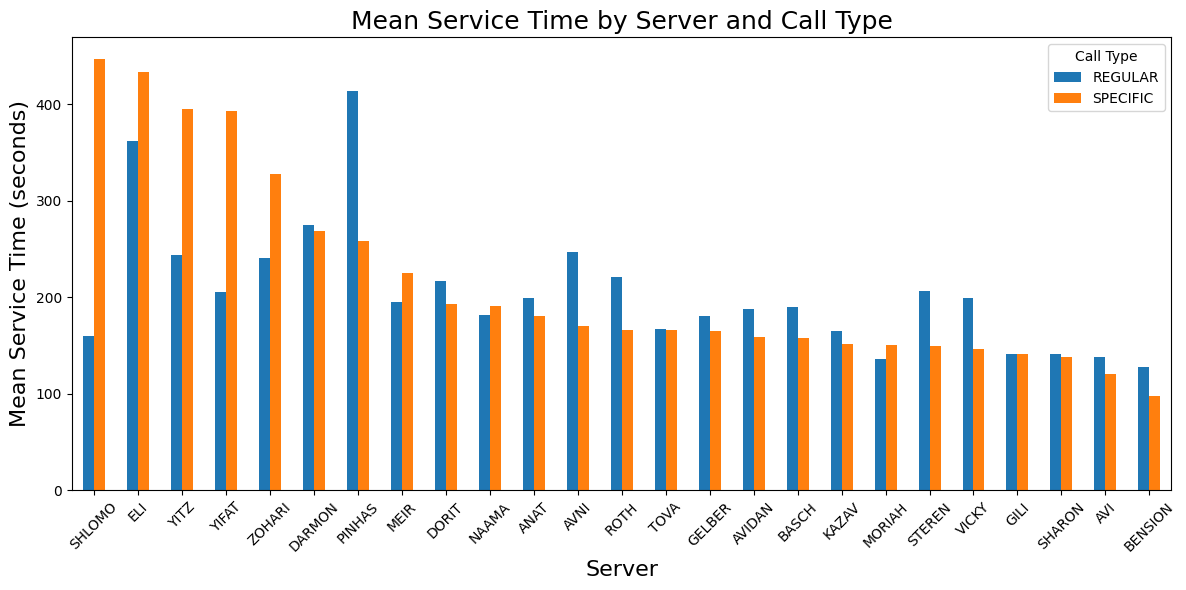

In [34]:
# Plot the mean service times for each server and call type
# Order by highest mean service time
mean_ser_time = mean_ser_time.sort_values(by='SPECIFIC', ascending=False)
plt.figure(figsize=(12, 6))
mean_ser_time.plot(kind='bar', color=['#1f77b4', '#ff7f0e'], ax=plt.gca())
plt.xlabel('Server')
plt.ylabel('Mean Service Time (seconds)')
plt.title('Mean Service Time by Server and Call Type')
plt.legend(title='Call Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

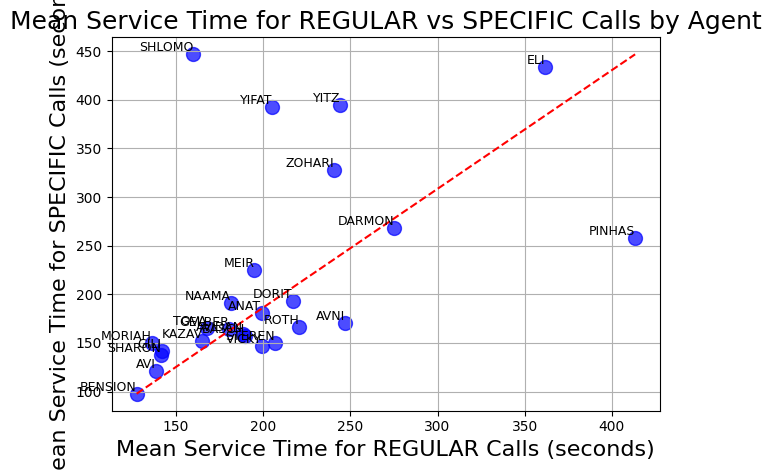

In [35]:
# Define the diagonal
regular_min = mean_ser_time['REGULAR'].min()
regular_max = mean_ser_time['REGULAR'].max()
specific_min = mean_ser_time['SPECIFIC'].min()
specific_max = mean_ser_time['SPECIFIC'].max()

# Create scatterplot of mean service times for each server and call type
plt.figure(figsize=(12, 6))
mean_ser_time.plot(kind='scatter', x='REGULAR', y='SPECIFIC', color='blue', s=100, alpha=0.7)
plt.xlabel('Mean Service Time for REGULAR Calls (seconds)')
plt.ylabel('Mean Service Time for SPECIFIC Calls (seconds)')
plt.title('Mean Service Time for REGULAR vs SPECIFIC Calls by Agent')
# Add middle line (y = x)
plt.plot([regular_min, regular_max],
         [specific_min, specific_max],
         'r--', label='Mean service time')

# Label the dots with server names
for server, row in mean_ser_time.iterrows():
    plt.text(row['REGULAR'], row['SPECIFIC'], server, fontsize=9, ha='right', va='bottom')

# plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [36]:
# Slope and intercept of the diagonal
m = (specific_max - specific_min) / (regular_max - regular_min)
c = specific_min - m * regular_min

# Calculate the y-value on the diagonal for each server's REGULAR mean
diagonal_y = m * mean_ser_time['REGULAR'] + c

# Find servers above and under the line
servers_above = mean_ser_time[mean_ser_time['SPECIFIC'] > diagonal_y]
servers_under = mean_ser_time[mean_ser_time['SPECIFIC'] < diagonal_y]

print("Servers ABOVE the plotted line:")
print(servers_above[['REGULAR', 'SPECIFIC']])

print("\nServers UNDER the plotted line:")
print(servers_under[['REGULAR', 'SPECIFIC']])

Servers ABOVE the plotted line:
type_group     REGULAR    SPECIFIC
server                            
SHLOMO      159.908163  446.838710
ELI         361.764706  433.777778
YITZ        244.134901  395.030151
YIFAT       205.054817  392.476471
ZOHARI      240.498322  327.569191
MEIR        194.906667  225.211538
NAAMA       181.256776  190.857143
TOVA        167.613037  165.768182
GELBER      180.160448  164.847458
KAZAV       165.104244  152.035533
MORIAH      135.926427  150.481742
GILI        141.678233  141.630000
SHARON      141.068376  137.796992
AVI         138.247344  120.717633

Servers UNDER the plotted line:
type_group     REGULAR    SPECIFIC
server                            
DARMON      275.068966  268.532468
PINHAS      413.367816  257.866935
DORIT       216.832812  192.779817
ANAT        199.019017  180.872659
AVNI        246.886092  170.300797
ROTH        220.586985  166.212308
AVIDAN      188.343137  158.813559
BASCH       189.517941  157.373272
STEREN      206.561886  1

In [37]:
# Group the servers into two groups based on their position relative to the diagonal
mean_ser_time['group'] = np.where(mean_ser_time['SPECIFIC'] > diagonal_y, '1', '2')

# Check the grouped means
grouped_means = (
    mean_ser_time.groupby('group')[['REGULAR', 'SPECIFIC']].mean()
)

print(grouped_means)

type_group     REGULAR    SPECIFIC
group                             
1           189.808747  246.074180
2           225.736929  177.005371


In [38]:
mean_ser_time

type_group,REGULAR,SPECIFIC,group
server,,,
SHLOMO,159.908163,446.838710,1
ELI,361.764706,433.777778,1
YITZ,244.134901,395.030151,1
YIFAT,205.054817,392.476471,1
ZOHARI,240.498322,327.569191,1
DARMON,275.068966,268.532468,2
PINHAS,413.367816,257.866935,2
MEIR,194.906667,225.211538,1
DORIT,216.832812,192.779817,2


In [39]:
# Number of agents in each group
mean_ser_time['group'].value_counts()

group
1    14
2    11
Name: count, dtype: int64

In [40]:
# Apply the grouping to the main dataframe
cc_type_df['group'] = np.where(cc_type_df['server'].isin(servers_above.index), '1', '2')

cc_type_df

,call_id,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,day_of_week,date_str,type_group,group
2,41888,PS,1999-07-01,1999-07-01 07:30:27,1999-07-01 07:30:35,8,0:00:00,0:00:00,0,AGENT,1999-07-01 07:30:35,1999-07-01 07:34:16,221,MORIAH,Thursday,1999-07-01,REGULAR,1
3,41889,PS,1999-07-01,1999-07-01 07:49:32,1999-07-01 07:49:37,5,7:49:37,7:50:27,50,AGENT,1999-07-01 07:50:26,1999-07-01 07:51:48,82,ANAT,Thursday,1999-07-01,REGULAR,2
4,41890,PS,1999-07-01,1999-07-01 08:03:56,1999-07-01 08:04:08,12,0:00:00,0:00:00,0,AGENT,1999-07-01 08:04:07,1999-07-01 08:05:25,78,KAZAV,Thursday,1999-07-01,REGULAR,1
5,41891,PS,1999-07-01,1999-07-01 08:22:12,1999-07-01 08:22:25,13,0:00:00,0:00:00,0,AGENT,1999-07-01 08:22:24,1999-07-01 08:32:12,588,YIFAT,Thursday,1999-07-01,REGULAR,1
6,41892,PS,1999-07-01,1999-07-01 08:32:24,1999-07-01 08:32:29,5,8:32:29,8:32:45,16,AGENT,1999-07-01 08:32:44,1999-07-01 08:33:39,55,TOVA,Thursday,1999-07-01,REGULAR,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39010,7886,IN,1999-07-30,1999-07-30 12:46:50,1999-07-30 12:46:59,9,12:46:59,12:48:28,89,AGENT,1999-07-30 12:48:27,1999-07-30 12:49:47,80,BENSION,Friday,1999-07-30,SPECIFIC,2
39011,7887,IN,1999-07-30,1999-07-30 13:01:19,1999-07-30 13:01:38,19,0:00:00,0:00:00,0,AGENT,1999-07-30 13:01:37,1999-07-30 13:15:12,815,BENSION,Friday,1999-07-30,SPECIFIC,2
39012,7888,IN,1999-07-30,1999-07-30 13:30:21,1999-07-30 13:30:36,15,0:00:00,0:00:00,0,AGENT,1999-07-30 13:30:35,1999-07-30 13:32:58,143,SHARON,Friday,1999-07-30,SPECIFIC,1
39019,7895,IN,1999-07-31,1999-07-31 22:09:48,1999-07-31 22:10:07,19,0:00:00,0:00:00,0,AGENT,1999-07-31 22:10:06,1999-07-31 22:11:46,100,AVI,Saturday,1999-07-31,SPECIFIC,1


In [41]:
# Number of calls performed by each group
cc_type_df['group'].value_counts()

group
1    16415
2    12631
Name: count, dtype: int64

In [42]:
# Calculate daily average and variance for each group
grouped_daily = cc_type_df.groupby(['date', 'group'])['ser_time'].agg(['mean', 'var']).reset_index()

mean_pivot = grouped_daily.pivot(index='date', columns='group', values='mean')
var_pivot = grouped_daily.pivot(index='date', columns='group', values='var')

mean_pivot, var_pivot

(group                1           2
 date                              
 1999-07-01  178.201232  192.453704
 1999-07-02  164.896907  171.504310
 1999-07-03  139.835443  224.195122
 1999-07-04  153.772227  195.191748
 1999-07-05  170.843811  218.088496
 1999-07-06  175.724054  208.289855
 1999-07-07  183.825203  200.995816
 1999-07-08  178.785455  209.766004
 1999-07-09  152.288288  182.011321
 1999-07-10  121.531915  302.674419
 1999-07-11  164.516939  195.848739
 1999-07-12  192.800231  206.962422
 1999-07-13  217.447566  183.180412
 1999-07-14  173.902954  184.329204
 1999-07-15  205.872822  223.193206
 1999-07-16  144.714286  190.993289
 1999-07-17  275.000000  172.500000
 1999-07-18  189.524046  192.854671
 1999-07-19  184.437140  223.615176
 1999-07-20  161.319889  201.527419
 1999-07-21  170.490814  254.779904
 1999-07-22  107.986079  136.755396
 1999-07-23  189.056410  208.053333
 1999-07-24  159.769231  170.111111
 1999-07-25  184.293706  203.063025
 1999-07-26  198.987654  198

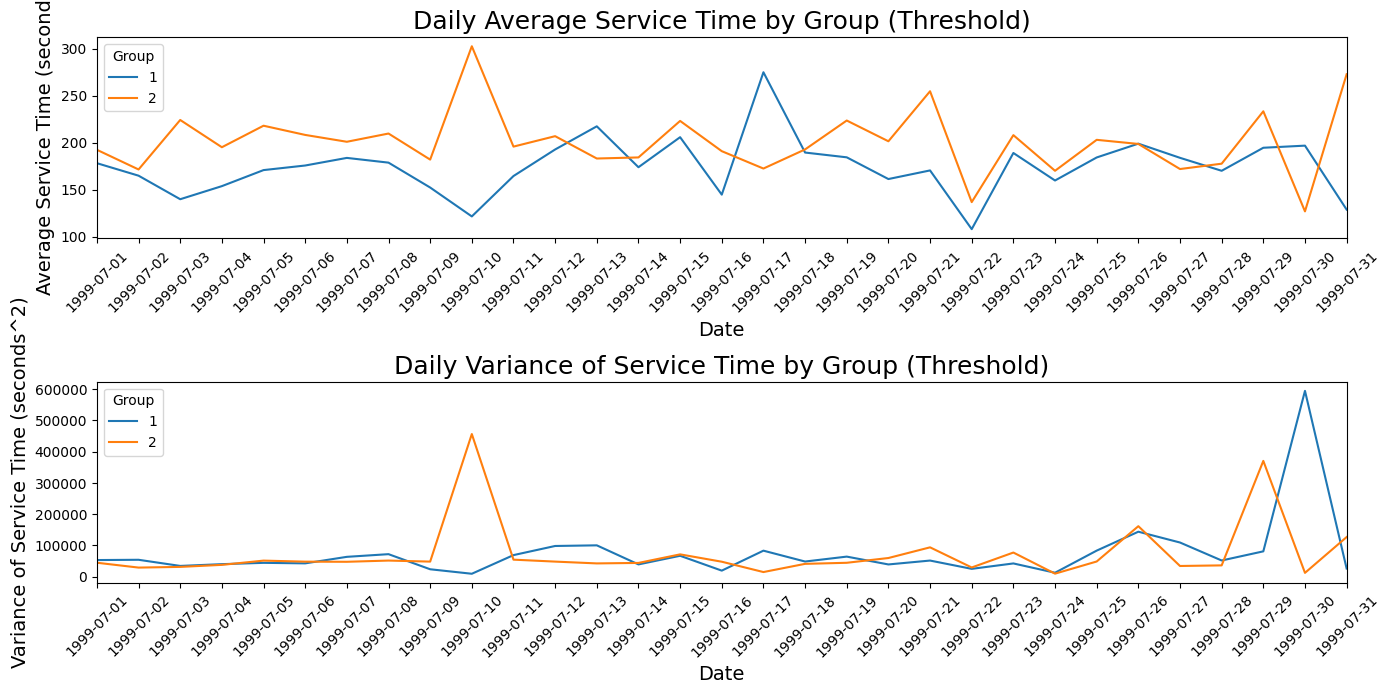

In [43]:
# Plot the average and variance as time series
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
ax1 = plt.gca()
mean_pivot.plot(ax=ax1)
plt.title('Daily Average Service Time by Group (Threshold)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Average Service Time (seconds)', fontsize=14)
plt.legend(title='Group')
# Force all dates to appear as x-ticks
ax1.set_xticks(mean_pivot.index)
ax1.set_xticklabels([date.strftime('%Y-%m-%d') for date in mean_pivot.index], rotation=45)

plt.subplot(2, 1, 2)
ax2 = plt.gca()
var_pivot.plot(ax=ax2)
plt.title('Daily Variance of Service Time by Group (Threshold)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Variance of Service Time (seconds^2)', fontsize=14)
plt.legend(title='Group')
plt.tight_layout()
# Force all dates to appear as x-ticks
ax2.set_xticks(var_pivot.index)
ax2.set_xticklabels([date.strftime('%Y-%m-%d') for date in var_pivot.index], rotation=45)

plt.show()

### Let's try performing Ward's clustering

In [44]:
scaler = StandardScaler()
X = scaler.fit_transform(mean_ser_time[['REGULAR', 'SPECIFIC']])

clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
mean_ser_time['cluster'] = clustering.fit_predict(X)

# Change cluster labels to '1' and '2'
mean_ser_time['cluster'] = mean_ser_time['cluster'].astype(str).replace({'0': '1', '1': '2'})

mean_ser_time

type_group,REGULAR,SPECIFIC,group,cluster
server,,,,
SHLOMO,159.908163,446.838710,1,1
ELI,361.764706,433.777778,1,1
YITZ,244.134901,395.030151,1,1
YIFAT,205.054817,392.476471,1,1
ZOHARI,240.498322,327.569191,1,1
DARMON,275.068966,268.532468,2,1
PINHAS,413.367816,257.866935,2,1
MEIR,194.906667,225.211538,1,2
DORIT,216.832812,192.779817,2,2


In [45]:
# Check the average service time for each cluster
mean_ser_time.groupby('cluster')[['REGULAR', 'SPECIFIC']].mean()

type_group,REGULAR,SPECIFIC
cluster,,
1,271.399670,360.298815
2,180.035055,159.444772


In [46]:
# Apply the grouping to the main dataframe
cc_type_df['cluster'] = np.where(cc_type_df['server'].isin(mean_ser_time[mean_ser_time['cluster'] == '1'].index), '1', '2')

# Check the number of calls performed by each group
cc_type_df[cc_type_df['cluster'] == '1']['ser_time'].count(), cc_type_df[cc_type_df['cluster'] == '2']['ser_time'].count()

(np.int64(4013), np.int64(25033))

In [47]:
# Calculate daily average and variance for each group
grouped_daily = cc_type_df.groupby(['date', 'cluster'])['ser_time'].agg(['mean', 'var']).reset_index()

mean_pivot = grouped_daily.pivot(index='date', columns='cluster', values='mean')
var_pivot = grouped_daily.pivot(index='date', columns='cluster', values='var')

mean_pivot, var_pivot

(cluster               1           2
 date                               
 1999-07-01   238.434375  168.504188
 1999-07-02   260.500000  162.742574
 1999-07-03   148.192308  174.319149
 1999-07-04   202.895753  157.026987
 1999-07-05   239.692308  169.952252
 1999-07-06   216.057471  180.721422
 1999-07-07   249.494624  179.934951
 1999-07-08   294.666667  173.890090
 1999-07-09   209.651515  162.004751
 1999-07-10  1823.666667  152.367816
 1999-07-11   279.054217  164.214519
 1999-07-12   292.073913  178.406278
 1999-07-13   381.197531  171.176829
 1999-07-14   261.058252  171.271952
 1999-07-15   340.324176  186.971031
 1999-07-16          NaN  187.018405
 1999-07-17   277.048780  177.541667
 1999-07-18   339.236641  172.679048
 1999-07-19   268.040909  180.562992
 1999-07-20   298.647619  157.856510
 1999-07-21   375.730539  171.436328
 1999-07-22   196.923077   94.962963
 1999-07-23   331.961538  186.341693
 1999-07-24   187.000000  150.857143
 1999-07-25   360.416058  174.957354
 

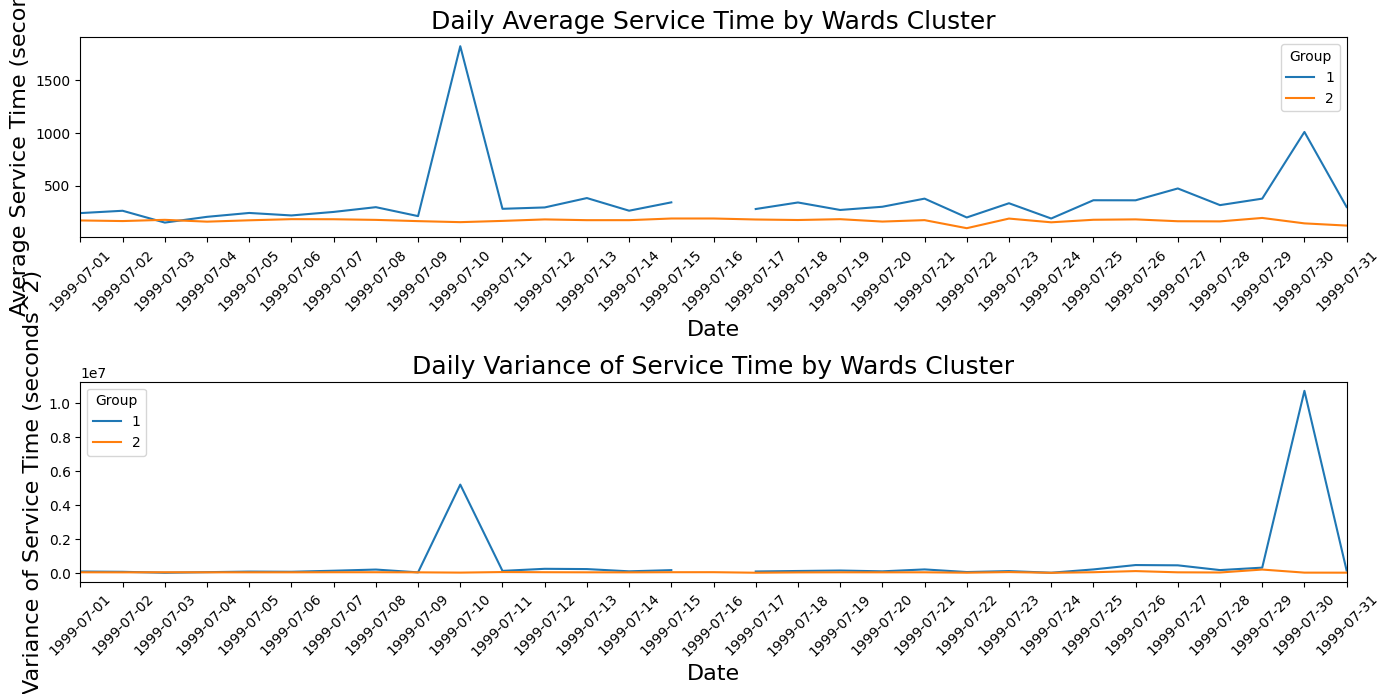

In [48]:
# Plot the average and variance as time series
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
ax1 = plt.gca()
mean_pivot.plot(ax=ax1)
plt.title('Daily Average Service Time by Wards Cluster')
plt.xlabel('Date')
plt.ylabel('Average Service Time (seconds)')
plt.legend(title='Group')
# Force all dates to appear as x-ticks
ax1.set_xticks(mean_pivot.index)
ax1.set_xticklabels([date.strftime('%Y-%m-%d') for date in mean_pivot.index], rotation=45)

plt.subplot(2, 1, 2)
ax2 = plt.gca()
var_pivot.plot(ax=ax2)
plt.title('Daily Variance of Service Time by Wards Cluster')
plt.xlabel('Date')
plt.ylabel('Variance of Service Time (seconds^2)')
plt.legend(title='Group')
plt.tight_layout()
# Force all dates to appear as x-ticks
ax2.set_xticks(var_pivot.index)
ax2.set_xticklabels([date.strftime('%Y-%m-%d') for date in var_pivot.index], rotation=45)

plt.show()

One particular date (1999-07-16) had their record missing. This is due to no agent from group 0 was working on that day.

From the ward clustering method we see how the spike in one particular date still happens, this is because of the outlier

In [49]:
# Display mean service time for each grouping (group, cluster)

# Display mean service time for each grouping (group, cluster)
display(mean_ser_time.groupby('group')[['REGULAR', 'SPECIFIC']].mean())
display(mean_ser_time.groupby('cluster')[['REGULAR', 'SPECIFIC']].mean())

type_group,REGULAR,SPECIFIC
group,,
1,189.808747,246.074180
2,225.736929,177.005371


type_group,REGULAR,SPECIFIC
cluster,,
1,271.399670,360.298815
2,180.035055,159.444772


### Let's finalise and decide to use group to proceed

In [50]:
# Finalise dataframe, exclude the group and cluster columns

cc_final_df = cc_type_df.copy()
cc_final_df = cc_final_df.drop(columns=['cluster'])

cc_final_df.head()

,call_id,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,day_of_week,date_str,type_group,group
2,41888,PS,1999-07-01,1999-07-01 07:30:27,1999-07-01 07:30:35,8,0:00:00,0:00:00,0,AGENT,1999-07-01 07:30:35,1999-07-01 07:34:16,221,MORIAH,Thursday,1999-07-01,REGULAR,1
3,41889,PS,1999-07-01,1999-07-01 07:49:32,1999-07-01 07:49:37,5,7:49:37,7:50:27,50,AGENT,1999-07-01 07:50:26,1999-07-01 07:51:48,82,ANAT,Thursday,1999-07-01,REGULAR,2
4,41890,PS,1999-07-01,1999-07-01 08:03:56,1999-07-01 08:04:08,12,0:00:00,0:00:00,0,AGENT,1999-07-01 08:04:07,1999-07-01 08:05:25,78,KAZAV,Thursday,1999-07-01,REGULAR,1
5,41891,PS,1999-07-01,1999-07-01 08:22:12,1999-07-01 08:22:25,13,0:00:00,0:00:00,0,AGENT,1999-07-01 08:22:24,1999-07-01 08:32:12,588,YIFAT,Thursday,1999-07-01,REGULAR,1
6,41892,PS,1999-07-01,1999-07-01 08:32:24,1999-07-01 08:32:29,5,8:32:29,8:32:45,16,AGENT,1999-07-01 08:32:44,1999-07-01 08:33:39,55,TOVA,Thursday,1999-07-01,REGULAR,1


### Let's calculate the interarrival times

In [51]:
# Split dataframe to regular and specific calls df

cc_regular_df = cc_final_df[cc_final_df['type_group'] == 'REGULAR'].copy()
cc_specific_df = cc_final_df[cc_final_df['type_group'] == 'SPECIFIC'].copy()

cc_regular_df = cc_regular_df.sort_values(by='vru_entry')
cc_specific_df = cc_specific_df.sort_values(by='vru_entry')

# Calculate interarrival times
cc_regular_df['interarrival_time'] = (
    cc_regular_df.groupby('date')['vru_entry'].diff().dt.total_seconds()
    )
cc_specific_df['interarrival_time'] = (
    cc_specific_df.groupby('date')['vru_entry'].diff().dt.total_seconds()
    )

# Move columns near vru_entry
cc_regular_df = cc_regular_df[['call_id', 'type', 'date', 'vru_entry', 'interarrival_time'] + [col for col in cc_regular_df.columns if col not in ['call_id', 'type', 'date', 'vru_entry', 'interarrival_time']]]
cc_specific_df = cc_specific_df[['call_id', 'type', 'date', 'vru_entry', 'interarrival_time'] + [col for col in cc_specific_df.columns if col not in ['call_id', 'type', 'date', 'vru_entry', 'interarrival_time']]]

cc_regular_df['interarrival_time'].count(), cc_specific_df['interarrival_time'].count(), \
    cc_regular_df.head(), cc_specific_df.head()

(np.int64(21339),
 np.int64(7645),
        call_id type       date           vru_entry  interarrival_time  \
 9246     36802   PS 1999-07-01 1999-07-01 07:02:02                NaN   
 5771     42243   PS 1999-07-01 1999-07-01 07:07:42              340.0   
 12589    11120   PS 1999-07-01 1999-07-01 07:07:55               13.0   
 13751    20926   PS 1999-07-01 1999-07-01 07:08:22               27.0   
 33996    23067   PS 1999-07-01 1999-07-01 07:09:11               49.0   
 
                  vru_exit  vru_time  q_start   q_exit  q_time outcome  \
 9246  1999-07-01 07:02:11         9  0:00:00  0:00:00       0   AGENT   
 5771  1999-07-01 07:07:52        10  0:00:00  0:00:00       0   AGENT   
 12589 1999-07-01 07:08:09        14  0:00:00  0:00:00       0   AGENT   
 13751 1999-07-01 07:08:30         8  0:00:00  0:00:00       0   AGENT   
 33996 1999-07-01 07:09:17         6  7:09:17  7:10:04      47   AGENT   
 
                 ser_start            ser_exit  ser_time  server day_of_w

In [52]:
cc_regular_df['interarrival_time'].describe(), cc_specific_df['interarrival_time'].describe()

(count    21339.000000
 mean        67.893200
 std         96.014914
 min          0.000000
 25%         18.000000
 50%         43.000000
 75%         88.000000
 max       5610.000000
 Name: interarrival_time, dtype: float64,
 count    7645.000000
 mean      183.172269
 std       252.206194
 min         0.000000
 25%        43.000000
 50%       107.000000
 75%       230.000000
 max      4409.000000
 Name: interarrival_time, dtype: float64)

In [53]:
# Check top 10 largest interarrival times
cc_regular_df.nlargest(10, 'interarrival_time')

,call_id,type,date,vru_entry,interarrival_time,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,day_of_week,date_str,type_group,group
5486,30819,PS,1999-07-22,1999-07-22 09:50:25,5610.0,1999-07-22 09:50:31,6,9:50:31,9:50:49,18,AGENT,1999-07-22 09:50:48,1999-07-22 09:53:55,187,ROTH,Thursday,1999-07-22,REGULAR,2
10431,38005,PS,1999-07-25,1999-07-25 22:23:15,4636.0,1999-07-25 22:23:30,15,0:00:00,0:00:00,0,AGENT,1999-07-25 22:23:29,1999-07-25 22:31:11,462,DARMON,Sunday,1999-07-25,REGULAR,2
21746,43124,PS,1999-07-22,1999-07-22 08:04:15,2188.0,1999-07-22 08:04:26,11,8:04:26,8:04:35,9,AGENT,1999-07-22 08:04:34,1999-07-22 08:05:08,34,AVI,Thursday,1999-07-22,REGULAR,1
10929,36664,PS,1999-07-05,1999-07-05 18:37:37,2143.0,1999-07-05 18:37:47,10,18:37:47,18:38:07,20,AGENT,1999-07-05 18:38:06,1999-07-05 18:38:13,7,AVI,Monday,1999-07-05,REGULAR,1
881,42782,PS,1999-07-15,1999-07-15 18:53:01,1671.0,1999-07-15 18:53:15,14,0:00:00,0:00:00,0,AGENT,1999-07-15 18:53:14,1999-07-15 19:01:28,494,AVNI,Thursday,1999-07-15,REGULAR,2
864,42765,PS,1999-07-15,1999-07-15 16:26:34,1444.0,1999-07-15 16:27:00,26,0:00:00,0:00:00,0,AGENT,1999-07-15 16:26:59,1999-07-15 16:28:10,71,AVNI,Thursday,1999-07-15,REGULAR,2
34944,24032,PS,1999-07-27,1999-07-27 19:48:41,1295.0,1999-07-27 19:48:47,6,19:48:47,19:49:25,38,AGENT,1999-07-27 19:49:24,1999-07-27 19:50:52,88,BENSION,Tuesday,1999-07-27,REGULAR,2
948,42850,PS,1999-07-17,1999-07-17 23:33:06,1165.0,1999-07-17 23:33:17,11,0:00:00,0:00:00,0,AGENT,1999-07-17 23:33:17,1999-07-17 23:39:32,375,YITZ,Saturday,1999-07-17,REGULAR,1
2428,38395,PS,1999-07-18,1999-07-18 10:32:32,1160.0,1999-07-18 10:32:43,11,0:00:00,0:00:00,0,AGENT,1999-07-18 10:32:41,1999-07-18 10:33:12,31,AVI,Sunday,1999-07-18,REGULAR,1
21767,43145,PS,1999-07-22,1999-07-22 14:36:08,1010.0,1999-07-22 14:36:14,6,14:36:14,14:36:37,23,AGENT,1999-07-22 14:36:35,1999-07-22 14:39:09,154,VICKY,Thursday,1999-07-22,REGULAR,2


In [54]:
cc_specific_df.nlargest(10, 'interarrival_time')

,call_id,type,date,vru_entry,interarrival_time,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,day_of_week,date_str,type_group,group
8077,43888,NE,1999-07-15,1999-07-15 21:06:17,4409.0,1999-07-15 21:06:22,5,21:06:22,21:08:24,122,AGENT,1999-07-15 21:08:23,1999-07-15 21:08:24,1,AVI,Thursday,1999-07-15,SPECIFIC,1
16035,42664,NW,1999-07-22,1999-07-22 15:08:48,4071.0,1999-07-22 15:09:03,15,0:00:00,0:00:00,0,AGENT,1999-07-22 15:09:02,1999-07-22 15:09:44,42,VICKY,Thursday,1999-07-22,SPECIFIC,2
38459,7335,IN,1999-07-15,1999-07-15 08:02:53,3751.0,1999-07-15 08:03:06,13,0:00:00,0:00:00,0,AGENT,1999-07-15 08:03:04,1999-07-15 08:28:42,1538,YIFAT,Thursday,1999-07-15,SPECIFIC,1
30713,43517,NW,1999-07-18,1999-07-18 23:48:43,3338.0,1999-07-18 23:49:00,17,0:00:00,0:00:00,0,AGENT,1999-07-18 23:48:59,1999-07-18 23:49:42,43,BENSION,Sunday,1999-07-18,SPECIFIC,2
15374,6343,IN,1999-07-18,1999-07-18 22:21:47,3040.0,1999-07-18 22:22:06,19,0:00:00,0:00:00,0,AGENT,1999-07-18 22:22:05,1999-07-18 22:24:18,133,BENSION,Sunday,1999-07-18,SPECIFIC,2
8119,43930,NW,1999-07-16,1999-07-16 13:12:32,2652.0,1999-07-16 13:12:45,13,0:00:00,0:00:00,0,AGENT,1999-07-16 13:12:44,1999-07-16 13:14:03,79,STEREN,Friday,1999-07-16,SPECIFIC,2
37117,21939,NW,1999-07-13,1999-07-13 23:04:53,2628.0,1999-07-13 23:05:03,10,23:05:03,23:05:49,46,AGENT,1999-07-13 23:05:48,1999-07-13 23:12:51,423,PINHAS,Tuesday,1999-07-13,SPECIFIC,2
25586,46692,NW,1999-07-19,1999-07-19 23:00:51,2626.0,1999-07-19 23:01:00,9,23:01:00,23:08:38,458,AGENT,1999-07-19 23:08:37,1999-07-19 23:16:54,497,PINHAS,Monday,1999-07-19,SPECIFIC,2
20162,44411,NW,1999-07-21,1999-07-21 20:38:48,2554.0,1999-07-21 20:39:02,14,0:00:00,0:00:00,0,AGENT,1999-07-21 20:39:02,1999-07-21 20:41:06,124,MEIR,Wednesday,1999-07-21,SPECIFIC,1
38679,7555,IN,1999-07-23,1999-07-23 14:28:27,2440.0,1999-07-23 14:28:36,9,14:28:36,14:31:56,200,AGENT,1999-07-23 14:31:55,1999-07-23 14:34:06,131,DORIT,Friday,1999-07-23,SPECIFIC,2


### I guess its normal, given how small the specific call samples.

In [55]:
# Check the 0 values in interarrival times
cc_regular_df[cc_regular_df['interarrival_time'] == 0]['interarrival_time'].count(), cc_specific_df[cc_specific_df['interarrival_time'] == 0]['interarrival_time'].count() 

(np.int64(168), np.int64(17))

In [56]:
cc_regular_df[cc_regular_df['interarrival_time'] == 0].head(10)

,call_id,type,date,vru_entry,interarrival_time,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,day_of_week,date_str,type_group,group
27456,5691,PS,1999-07-01,1999-07-01 08:28:51,0.0,1999-07-01 08:28:56,5,8:28:56,8:30:25,89,AGENT,1999-07-01 08:30:25,1999-07-01 08:33:26,181,KAZAV,Thursday,1999-07-01,REGULAR,1
19023,43248,PS,1999-07-01,1999-07-01 09:56:22,0.0,1999-07-01 09:56:28,6,9:56:28,9:56:46,18,AGENT,1999-07-01 09:56:46,1999-07-01 10:03:04,378,SHARON,Thursday,1999-07-01,REGULAR,1
12602,11133,PS,1999-07-01,1999-07-01 11:29:56,0.0,1999-07-01 11:30:02,6,11:30:02,11:30:14,12,AGENT,1999-07-01 11:30:13,1999-07-01 11:30:14,1,ANAT,Thursday,1999-07-01,REGULAR,2
7227,43024,PS,1999-07-01,1999-07-01 11:46:13,0.0,1999-07-01 11:46:19,6,11:46:19,11:48:34,135,AGENT,1999-07-01 11:48:34,1999-07-01 11:55:29,415,BASCH,Thursday,1999-07-01,REGULAR,2
2926,33038,PS,1999-07-01,1999-07-01 11:57:15,0.0,1999-07-01 11:57:21,6,11:57:21,12:01:05,224,AGENT,1999-07-01 12:01:04,1999-07-01 12:03:32,148,KAZAV,Thursday,1999-07-01,REGULAR,1
16590,43280,PS,1999-07-01,1999-07-01 12:01:37,0.0,1999-07-01 12:01:43,6,12:01:43,12:02:24,41,AGENT,1999-07-01 12:02:23,1999-07-01 12:12:23,600,BASCH,Thursday,1999-07-01,REGULAR,2
23,41909,PS,1999-07-01,1999-07-01 12:20:59,0.0,1999-07-01 12:21:04,5,12:21:04,12:23:09,125,AGENT,1999-07-01 12:23:08,1999-07-01 12:27:33,265,MORIAH,Thursday,1999-07-01,REGULAR,1
23939,45017,PS,1999-07-01,1999-07-01 12:28:54,0.0,1999-07-01 12:29:00,6,12:29:00,12:29:51,51,AGENT,1999-07-01 12:29:50,1999-07-01 12:30:21,31,KAZAV,Thursday,1999-07-01,REGULAR,1
35226,22158,PS,1999-07-01,1999-07-01 14:20:06,0.0,1999-07-01 14:20:12,6,14:20:12,14:21:13,61,AGENT,1999-07-01 14:21:12,1999-07-01 14:28:44,452,ROTH,Thursday,1999-07-01,REGULAR,2
31595,40299,PS,1999-07-01,1999-07-01 14:22:01,0.0,1999-07-01 14:22:07,6,14:22:07,14:23:54,107,AGENT,1999-07-01 14:23:53,1999-07-01 14:26:03,130,TOVA,Thursday,1999-07-01,REGULAR,1


In [57]:
cc_specific_df[cc_specific_df['interarrival_time'] == 0].head(10)

,call_id,type,date,vru_entry,interarrival_time,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,day_of_week,date_str,type_group,group
35194,22126,NE,1999-07-01,1999-07-01 10:18:22,0.0,1999-07-01 10:18:32,10,0:00:00,0:00:00,0,AGENT,1999-07-01 10:18:31,1999-07-01 10:23:41,310,ELI,Thursday,1999-07-01,SPECIFIC,1
1605,37553,NE,1999-07-04,1999-07-04 10:01:55,0.0,1999-07-04 10:02:00,5,10:02:00,10:03:42,102,AGENT,1999-07-04 10:03:40,1999-07-04 10:04:17,37,VICKY,Sunday,1999-07-04,SPECIFIC,2
12377,3479,TT,1999-07-04,1999-07-04 16:52:27,0.0,1999-07-04 16:52:27,0,16:52:27,16:52:58,31,AGENT,1999-07-04 16:52:57,1999-07-04 16:53:09,12,AVNI,Sunday,1999-07-04,SPECIFIC,2
9447,37006,NW,1999-07-04,1999-07-04 19:23:15,0.0,1999-07-04 19:23:25,10,19:23:25,19:27:06,221,AGENT,1999-07-04 19:27:05,1999-07-04 19:28:49,104,GILI,Sunday,1999-07-04,SPECIFIC,1
6304,42782,NW,1999-07-08,1999-07-08 12:24:07,0.0,1999-07-08 12:24:16,9,12:24:16,12:28:31,255,AGENT,1999-07-08 12:28:30,1999-07-08 12:29:43,73,SHARON,Thursday,1999-07-08,SPECIFIC,1
4968,30289,NE,1999-07-11,1999-07-11 10:46:49,0.0,1999-07-11 10:46:55,6,10:46:55,10:47:23,28,AGENT,1999-07-11 10:47:23,1999-07-11 11:01:38,855,ELI,Sunday,1999-07-11,SPECIFIC,1
26513,6052,NE,1999-07-13,1999-07-13 10:26:27,0.0,1999-07-13 10:26:32,5,10:26:32,10:27:46,74,AGENT,1999-07-13 10:27:45,1999-07-13 10:27:46,1,MORIAH,Tuesday,1999-07-13,SPECIFIC,1
9950,37517,NW,1999-07-13,1999-07-13 12:06:33,0.0,1999-07-13 12:06:43,10,12:06:43,12:10:39,236,AGENT,1999-07-13 12:10:38,1999-07-13 12:11:33,55,AVI,Tuesday,1999-07-13,SPECIFIC,1
19818,44063,NE,1999-07-15,1999-07-15 10:53:43,0.0,1999-07-15 10:53:49,6,10:53:49,10:55:23,94,AGENT,1999-07-15 10:55:23,1999-07-15 11:10:19,896,ELI,Thursday,1999-07-15,SPECIFIC,1
8176,43992,NE,1999-07-18,1999-07-18 11:38:57,0.0,1999-07-18 11:39:04,7,11:39:04,11:40:59,115,AGENT,1999-07-18 11:40:58,1999-07-18 11:44:46,228,ZOHARI,Sunday,1999-07-18,SPECIFIC,1


In [58]:
# Check several records with same vru_entry time
dupe_times = cc_regular_df[cc_regular_df['interarrival_time'] == 0]['vru_entry'].unique()

cc_regular_df[cc_regular_df['vru_entry'].isin(dupe_times)].sort_values(by='vru_entry').head(20)

,call_id,type,date,vru_entry,interarrival_time,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,day_of_week,date_str,type_group,group
10652,36384,PS,1999-07-01,1999-07-01 08:28:51,110.0,1999-07-01 08:28:56,5,8:28:56,8:30:59,123,AGENT,1999-07-01 08:30:58,1999-07-01 08:32:39,101,TOVA,Thursday,1999-07-01,REGULAR,1
27456,5691,PS,1999-07-01,1999-07-01 08:28:51,0.0,1999-07-01 08:28:56,5,8:28:56,8:30:25,89,AGENT,1999-07-01 08:30:25,1999-07-01 08:33:26,181,KAZAV,Thursday,1999-07-01,REGULAR,1
29092,41870,PS,1999-07-01,1999-07-01 09:56:22,30.0,1999-07-01 09:56:28,6,9:56:28,9:57:33,65,AGENT,1999-07-01 09:57:32,1999-07-01 09:58:18,46,TOVA,Thursday,1999-07-01,REGULAR,1
19023,43248,PS,1999-07-01,1999-07-01 09:56:22,0.0,1999-07-01 09:56:28,6,9:56:28,9:56:46,18,AGENT,1999-07-01 09:56:46,1999-07-01 10:03:04,378,SHARON,Thursday,1999-07-01,REGULAR,1
5784,42256,PS,1999-07-01,1999-07-01 11:29:56,10.0,1999-07-01 11:30:04,8,0:00:00,0:00:00,0,AGENT,1999-07-01 11:30:04,1999-07-01 11:31:19,75,ROTH,Thursday,1999-07-01,REGULAR,2
12602,11133,PS,1999-07-01,1999-07-01 11:29:56,0.0,1999-07-01 11:30:02,6,11:30:02,11:30:14,12,AGENT,1999-07-01 11:30:13,1999-07-01 11:30:14,1,ANAT,Thursday,1999-07-01,REGULAR,2
10663,36395,PS,1999-07-01,1999-07-01 11:46:13,16.0,1999-07-01 11:46:20,7,11:46:20,11:49:35,195,AGENT,1999-07-01 11:49:33,1999-07-01 11:50:39,66,SHARON,Thursday,1999-07-01,REGULAR,1
7227,43024,PS,1999-07-01,1999-07-01 11:46:13,0.0,1999-07-01 11:46:19,6,11:46:19,11:48:34,135,AGENT,1999-07-01 11:48:34,1999-07-01 11:55:29,415,BASCH,Thursday,1999-07-01,REGULAR,2
2926,33038,PS,1999-07-01,1999-07-01 11:57:15,0.0,1999-07-01 11:57:21,6,11:57:21,12:01:05,224,AGENT,1999-07-01 12:01:04,1999-07-01 12:03:32,148,KAZAV,Thursday,1999-07-01,REGULAR,1
5788,42260,PS,1999-07-01,1999-07-01 11:57:15,6.0,1999-07-01 11:57:20,5,11:57:20,11:59:27,127,AGENT,1999-07-01 11:59:26,1999-07-01 12:01:20,114,ANAT,Thursday,1999-07-01,REGULAR,2


In [59]:
# Check several records with same vru_entry time
dupe_times = cc_specific_df[cc_specific_df['interarrival_time'] == 0]['vru_entry'].unique()

cc_specific_df[cc_specific_df['vru_entry'].isin(dupe_times)].sort_values(by='vru_entry').head(20)

,call_id,type,date,vru_entry,interarrival_time,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,day_of_week,date_str,type_group,group
27474,5709,NW,1999-07-01,1999-07-01 10:18:22,44.0,1999-07-01 10:18:31,9,10:18:31,10:21:19,168,AGENT,1999-07-01 10:21:18,1999-07-01 10:23:06,108,KAZAV,Thursday,1999-07-01,SPECIFIC,1
35194,22126,NE,1999-07-01,1999-07-01 10:18:22,0.0,1999-07-01 10:18:32,10,0:00:00,0:00:00,0,AGENT,1999-07-01 10:18:31,1999-07-01 10:23:41,310,ELI,Thursday,1999-07-01,SPECIFIC,1
12732,11267,NW,1999-07-04,1999-07-04 10:01:55,13.0,1999-07-04 10:02:04,9,10:02:04,10:05:50,226,AGENT,1999-07-04 10:05:49,1999-07-04 10:06:59,70,AVI,Sunday,1999-07-04,SPECIFIC,1
1605,37553,NE,1999-07-04,1999-07-04 10:01:55,0.0,1999-07-04 10:02:00,5,10:02:00,10:03:42,102,AGENT,1999-07-04 10:03:40,1999-07-04 10:04:17,37,VICKY,Sunday,1999-07-04,SPECIFIC,2
193,42082,NE,1999-07-04,1999-07-04 16:52:27,77.0,1999-07-04 16:52:39,12,0:00:00,0:00:00,0,AGENT,1999-07-04 16:52:38,1999-07-04 17:15:54,1396,ELI,Sunday,1999-07-04,SPECIFIC,1
12377,3479,TT,1999-07-04,1999-07-04 16:52:27,0.0,1999-07-04 16:52:27,0,16:52:27,16:52:58,31,AGENT,1999-07-04 16:52:57,1999-07-04 16:53:09,12,AVNI,Sunday,1999-07-04,SPECIFIC,2
9000,3222,TT,1999-07-04,1999-07-04 19:23:15,44.0,1999-07-04 19:23:16,1,0:00:00,0:00:00,0,AGENT,1999-07-04 19:23:16,1999-07-04 19:23:31,15,GELBER,Sunday,1999-07-04,SPECIFIC,1
9447,37006,NW,1999-07-04,1999-07-04 19:23:15,0.0,1999-07-04 19:23:25,10,19:23:25,19:27:06,221,AGENT,1999-07-04 19:27:05,1999-07-04 19:28:49,104,GILI,Sunday,1999-07-04,SPECIFIC,1
6304,42782,NW,1999-07-08,1999-07-08 12:24:07,0.0,1999-07-08 12:24:16,9,12:24:16,12:28:31,255,AGENT,1999-07-08 12:28:30,1999-07-08 12:29:43,73,SHARON,Thursday,1999-07-08,SPECIFIC,1
9753,37318,NW,1999-07-08,1999-07-08 12:24:07,9.0,1999-07-08 12:24:17,10,12:24:17,12:29:49,332,AGENT,1999-07-08 12:29:48,1999-07-08 12:30:18,30,SHARON,Thursday,1999-07-08,SPECIFIC,1


As we can see the records with same `vru_time` have different values in other columns, so these records are valid.

Because in the real world data, interarrival times do not follow the Poisson process assumption, this is fine and we can proceed

### Overload problem
The interarrival numbers are quite low compared to the service times. This is expected, because originally the calls were expected to be served by 8 agents. Let's have another column of arrival times multiplied by 4 to mirror the original case.

In [60]:
# Add columns for interarrival x4
cc_regular_df['interarrival_time_x4'] = cc_regular_df['interarrival_time'] * 4
cc_specific_df['interarrival_time_x4'] = cc_specific_df['interarrival_time'] * 4

In [61]:
# Describe the interarrival times x4
cc_regular_df['interarrival_time_x4'].describe(), cc_specific_df['interarrival_time_x4'].describe()

(count    21339.000000
 mean       271.572801
 std        384.059658
 min          0.000000
 25%         72.000000
 50%        172.000000
 75%        352.000000
 max      22440.000000
 Name: interarrival_time_x4, dtype: float64,
 count     7645.000000
 mean       732.689078
 std       1008.824777
 min          0.000000
 25%        172.000000
 50%        428.000000
 75%        920.000000
 max      17636.000000
 Name: interarrival_time_x4, dtype: float64)

In [62]:
# Combine the two dataframes back into one
cc_final_df = pd.concat([cc_regular_df, cc_specific_df], ignore_index=True)

cc_final_df.head()

,call_id,type,date,vru_entry,interarrival_time,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,day_of_week,date_str,type_group,group,interarrival_time_x4
0,36802,PS,1999-07-01,1999-07-01 07:02:02,NaN,1999-07-01 07:02:11,9,0:00:00,0:00:00,0,AGENT,1999-07-01 07:02:11,1999-07-01 07:02:22,11,TOVA,Thursday,1999-07-01,REGULAR,1,NaN
1,42243,PS,1999-07-01,1999-07-01 07:07:42,340.0,1999-07-01 07:07:52,10,0:00:00,0:00:00,0,AGENT,1999-07-01 07:07:51,1999-07-01 07:12:31,280,TOVA,Thursday,1999-07-01,REGULAR,1,1360.0
2,11120,PS,1999-07-01,1999-07-01 07:07:55,13.0,1999-07-01 07:08:09,14,0:00:00,0:00:00,0,AGENT,1999-07-01 07:08:08,1999-07-01 07:11:42,214,ANAT,Thursday,1999-07-01,REGULAR,2,52.0
3,20926,PS,1999-07-01,1999-07-01 07:08:22,27.0,1999-07-01 07:08:30,8,0:00:00,0:00:00,0,AGENT,1999-07-01 07:08:29,1999-07-01 07:09:56,87,MORIAH,Thursday,1999-07-01,REGULAR,1,108.0
4,23067,PS,1999-07-01,1999-07-01 07:09:11,49.0,1999-07-01 07:09:17,6,7:09:17,7:10:04,47,AGENT,1999-07-01 07:10:03,1999-07-01 07:11:24,81,MORIAH,Thursday,1999-07-01,REGULAR,1,196.0


In [63]:
cc_final_df[(cc_final_df['group'] == '1') & (cc_final_df['type_group'] == 'REGULAR')]

,call_id,type,date,vru_entry,interarrival_time,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,day_of_week,date_str,type_group,group,interarrival_time_x4
0,36802,PS,1999-07-01,1999-07-01 07:02:02,NaN,1999-07-01 07:02:11,9,0:00:00,0:00:00,0,AGENT,1999-07-01 07:02:11,1999-07-01 07:02:22,11,TOVA,Thursday,1999-07-01,REGULAR,1,NaN
1,42243,PS,1999-07-01,1999-07-01 07:07:42,340.0,1999-07-01 07:07:52,10,0:00:00,0:00:00,0,AGENT,1999-07-01 07:07:51,1999-07-01 07:12:31,280,TOVA,Thursday,1999-07-01,REGULAR,1,1360.0
3,20926,PS,1999-07-01,1999-07-01 07:08:22,27.0,1999-07-01 07:08:30,8,0:00:00,0:00:00,0,AGENT,1999-07-01 07:08:29,1999-07-01 07:09:56,87,MORIAH,Thursday,1999-07-01,REGULAR,1,108.0
4,23067,PS,1999-07-01,1999-07-01 07:09:11,49.0,1999-07-01 07:09:17,6,7:09:17,7:10:04,47,AGENT,1999-07-01 07:10:03,1999-07-01 07:11:24,81,MORIAH,Thursday,1999-07-01,REGULAR,1,196.0
7,44971,PS,1999-07-01,1999-07-01 07:15:04,16.0,1999-07-01 07:15:12,8,0:00:00,0:00:00,0,AGENT,1999-07-01 07:15:12,1999-07-01 07:20:00,288,MORIAH,Thursday,1999-07-01,REGULAR,1,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21363,43365,PS,1999-07-31,1999-07-31 23:31:06,17.0,1999-07-31 23:31:12,6,23:31:12,23:32:21,69,AGENT,1999-07-31 23:32:20,1999-07-31 23:32:38,18,ZOHARI,Saturday,1999-07-31,REGULAR,1,68.0
21364,44356,PS,1999-07-31,1999-07-31 23:31:46,40.0,1999-07-31 23:31:51,5,23:31:51,23:32:37,46,AGENT,1999-07-31 23:32:36,1999-07-31 23:35:59,203,AVI,Saturday,1999-07-31,REGULAR,1,160.0
21366,7002,PS,1999-07-31,1999-07-31 23:37:34,80.0,1999-07-31 23:37:44,10,0:00:00,0:00:00,0,AGENT,1999-07-31 23:37:43,1999-07-31 23:38:05,22,AVI,Saturday,1999-07-31,REGULAR,1,320.0
21367,31108,PS,1999-07-31,1999-07-31 23:48:57,683.0,1999-07-31 23:49:07,10,0:00:00,0:00:00,0,AGENT,1999-07-31 23:49:07,1999-07-31 23:51:38,151,AVI,Saturday,1999-07-31,REGULAR,1,2732.0


In [64]:
cc_final_df[(cc_final_df['group'] == '1') & (cc_final_df['type_group'] == 'REGULAR')]['ser_time']

0         11
1        280
3         87
4         81
7        288
        ... 
21363     18
21364    203
21366     22
21367    151
21369    123
Name: ser_time, Length: 11815, dtype: int64

In [65]:
cc_final_df[(cc_final_df['group'] == '2') & (cc_final_df['type_group'] == 'REGULAR')]['ser_time'].mean()

np.float64(207.97488226059656)

In [66]:
cc_final_df[(cc_final_df['type_group'] == 'REGULAR')]['interarrival_time']

0          NaN
1        340.0
2         13.0
3         27.0
4         49.0
         ...  
21365    268.0
21366     80.0
21367    683.0
21368    432.0
21369     25.0
Name: interarrival_time, Length: 21370, dtype: float64

### Finally, perform KS test to get all our parameters

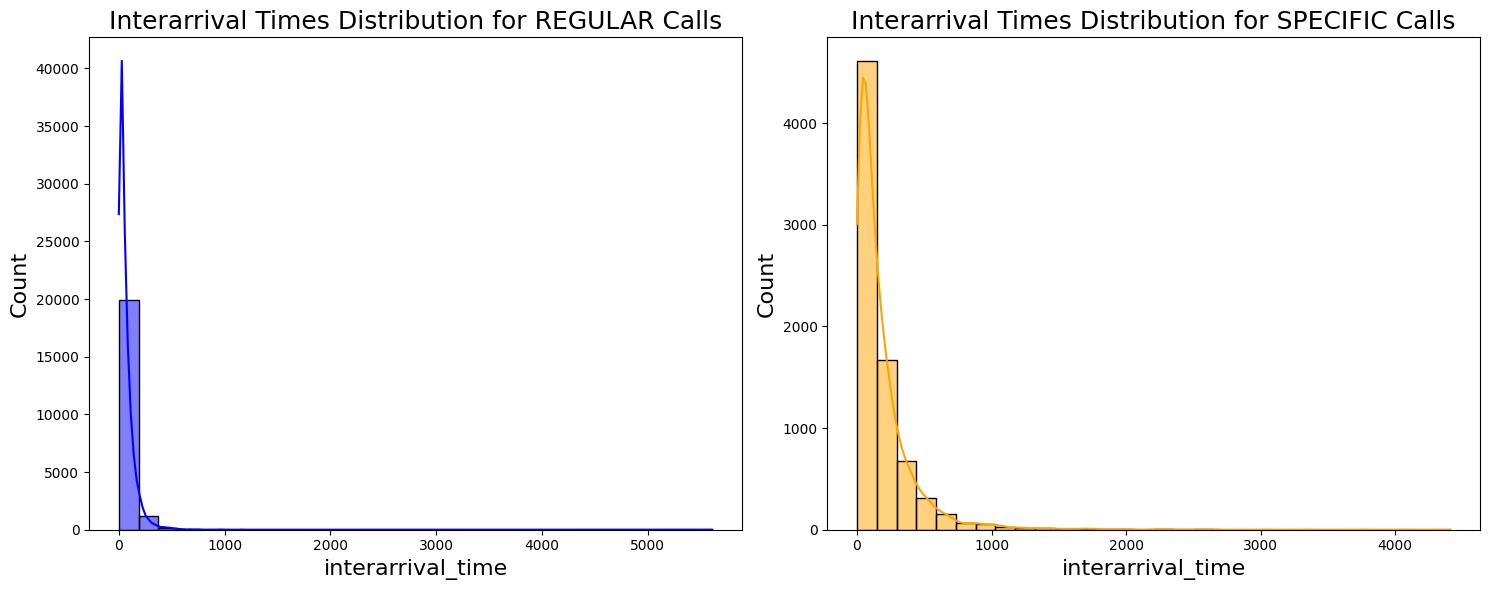

In [67]:
# Plot interarrival times distribution for both call types
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
sns.histplot(cc_regular_df['interarrival_time'], bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Interarrival Times Distribution for REGULAR Calls')
sns.histplot(cc_specific_df['interarrival_time'], bins=30, kde=True, ax=axes[1], color='orange')
axes[1].set_title('Interarrival Times Distribution for SPECIFIC Calls')
plt.tight_layout()
plt.show()

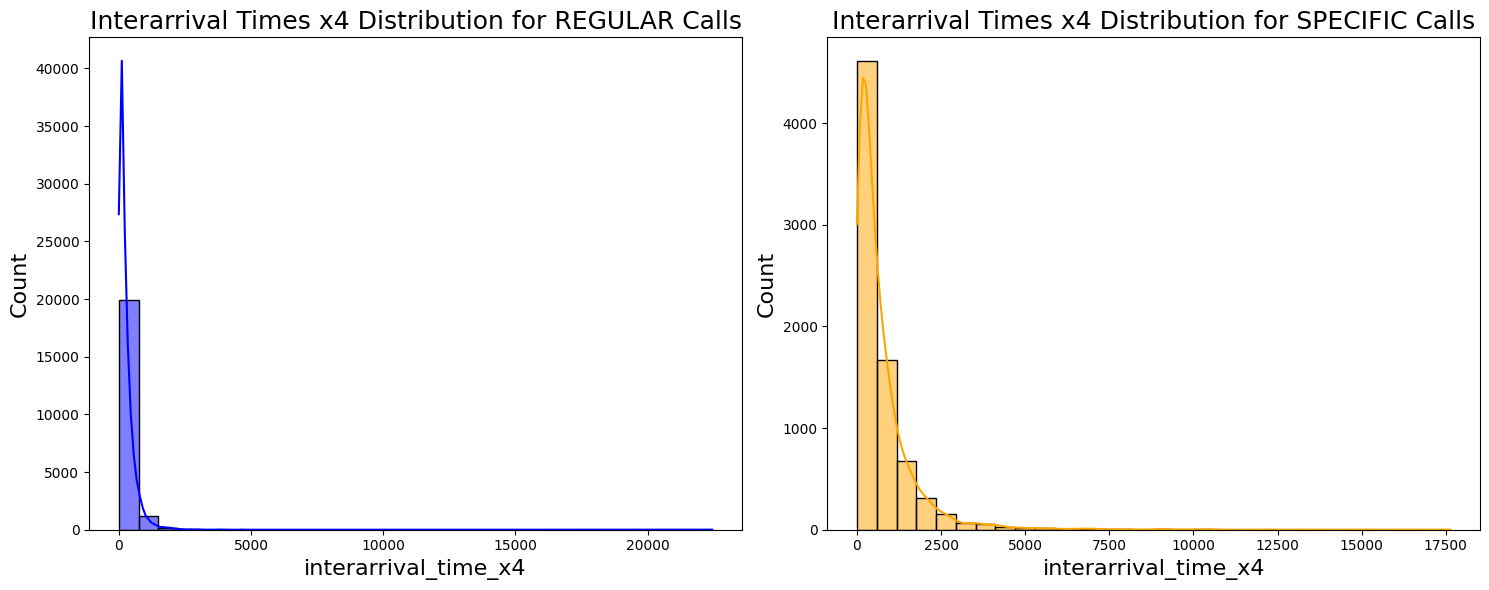

In [68]:
# Plot interarrival times distribution for both call types
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
sns.histplot(cc_regular_df['interarrival_time_x4'], bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Interarrival Times x4 Distribution for REGULAR Calls')
sns.histplot(cc_specific_df['interarrival_time_x4'], bins=30, kde=True, ax=axes[1], color='orange')
axes[1].set_title('Interarrival Times x4 Distribution for SPECIFIC Calls')
plt.tight_layout()
plt.show()

In [69]:
# Remove NA values in interarrival times
cc_regular_nona_df = cc_regular_df.dropna(subset=['interarrival_time'])
cc_specific_nona_df = cc_specific_df.dropna(subset=['interarrival_time'])

# KS on interarrival times
result_regular = ks_test_distributions_df(cc_regular_nona_df['interarrival_time'])
result_specific = ks_test_distributions_df(cc_specific_nona_df['interarrival_time'])
result_regular_x4 = ks_test_distributions_df(cc_regular_nona_df['interarrival_time_x4'])
result_specific_x4 = ks_test_distributions_df(cc_specific_nona_df['interarrival_time_x4'])

print("Regular Calls Interarrival Times Distribution Test Results:")
print(result_regular)
print("\nSpecific Calls Interarrival Times Distribution Test Results:")
print(result_specific)

c:\Users\irfan\Box\1 - Research Project\Code\.venv\Lib\site-packages\scipy\stats\_continuous_distns.py:6921: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
c:\Users\irfan\Box\1 - Research Project\Code\.venv\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\irfan\Box\1 - Research Project\Code\.venv\Lib\site-packages\scipy\stats\_continuous_distns.py:6921: RuntimeWarning: divide by zero encountered in log
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
c:\Users\irfan\Box\1 - Research Project\Code\.venv\Lib\site-packages\scipy\stats\_continuous_distns.py:6921: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
c:\Users\irfan\Box\1 - Research Project\Code\.venv\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered 

Regular Calls Interarrival Times Distribution Test Results:
             D-statistic  p-value  reject_null     best_fit
exponential     0.658700      0.0         True  exponential
gamma           0.990554      0.0         True  exponential
lognormal       0.505848      0.0         True  exponential
weibull         0.496880      0.0         True  exponential

Specific Calls Interarrival Times Distribution Test Results:
             D-statistic       p-value  reject_null   best_fit
exponential     0.676782  0.000000e+00         True  lognormal
gamma           0.985419  0.000000e+00         True  lognormal
lognormal       0.030537  1.255757e-06         True  lognormal
weibull         0.071496  1.992715e-34         True  lognormal


Surely 0 values resulted in zero division or log(0) error.

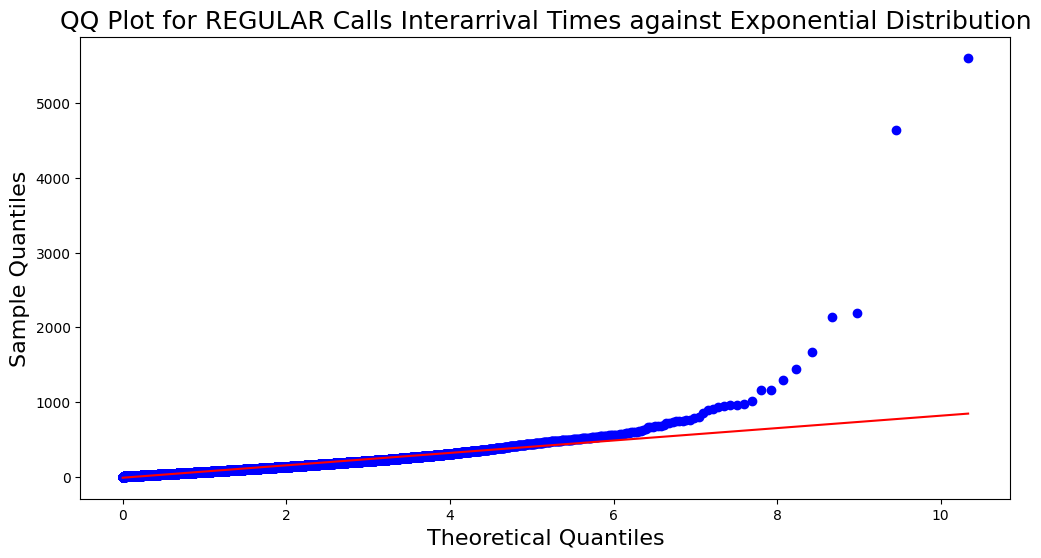

In [70]:
# QQ plots for interarrival times
plt.figure(figsize=(12, 6))
qq_plot_exp(cc_regular_nona_df['interarrival_time'], 'QQ Plot for REGULAR Calls Interarrival Times against Exponential Distribution')
plt.show()

In [71]:
# Check if we remove 0 interarrival times
cc_regular_df_nozero = cc_regular_nona_df[cc_regular_nona_df['interarrival_time'] > 0]
cc_specific_df_nozero = cc_specific_nona_df[cc_specific_nona_df['interarrival_time'] > 0]

# KS on interarrival times without 0 values
result_regular_nozero = ks_test_distributions_df(cc_regular_df_nozero['interarrival_time'])
result_specific_nozero = ks_test_distributions_df(cc_specific_df_nozero['interarrival_time'])
result_regular_nozero_x4 = ks_test_distributions_df(cc_regular_df_nozero['interarrival_time_x4'])
result_specific_nozero_x4 = ks_test_distributions_df(cc_specific_df_nozero['interarrival_time_x4'])

print("Regular Calls Interarrival Times Distribution Test Results (without 0 values):")
print(result_regular_nozero)
print("\nSpecific Calls Interarrival Times Distribution Test Results (without 0 values):")
print(result_specific_nozero)

Regular Calls Interarrival Times Distribution Test Results (without 0 values):
             D-statistic       p-value  reject_null   best_fit
exponential     0.660290  0.000000e+00         True  lognormal
gamma           0.981922  0.000000e+00         True  lognormal
lognormal       0.033669  2.754266e-21         True  lognormal
weibull         0.532229  0.000000e+00         True  lognormal

Specific Calls Interarrival Times Distribution Test Results (without 0 values):
             D-statistic       p-value  reject_null   best_fit
exponential     0.676062  0.000000e+00         True  lognormal
gamma           0.983159  0.000000e+00         True  lognormal
lognormal       0.030741  1.070577e-06         True  lognormal
weibull         0.121352  2.377923e-98         True  lognormal


In [72]:
print("\nRegular Calls Interarrival Times x4 Distribution Test Results (without 0 values):")
print(result_regular_nozero_x4)
print("\nSpecific Calls Interarrival Times x4 Distribution Test Results (without 0 values):")
print(result_specific_nozero_x4)


Regular Calls Interarrival Times x4 Distribution Test Results (without 0 values):
             D-statistic       p-value  reject_null   best_fit
exponential     0.660290  0.000000e+00         True  lognormal
gamma           0.985250  0.000000e+00         True  lognormal
lognormal       0.033669  2.754266e-21         True  lognormal
weibull         0.532229  0.000000e+00         True  lognormal

Specific Calls Interarrival Times x4 Distribution Test Results (without 0 values):
             D-statistic       p-value  reject_null   best_fit
exponential     0.676062  0.000000e+00         True  lognormal
gamma           0.992339  0.000000e+00         True  lognormal
lognormal       0.030741  1.070577e-06         True  lognormal
weibull         0.121352  2.377923e-98         True  lognormal


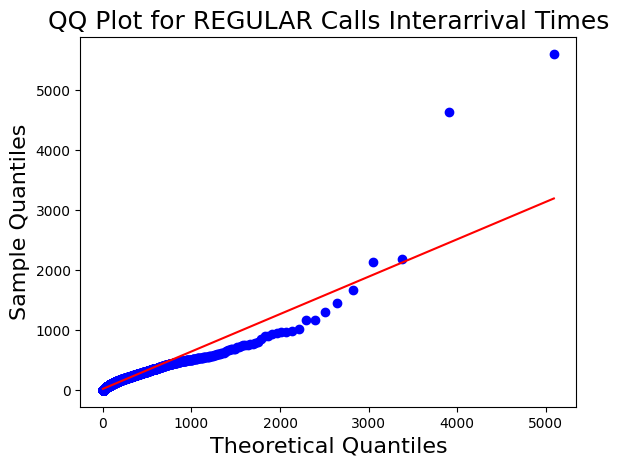

In [73]:
# QQ plots for interarrival times
qq_plot_lognorm(cc_regular_df_nozero['interarrival_time'], 'QQ Plot for REGULAR Calls Interarrival Times')

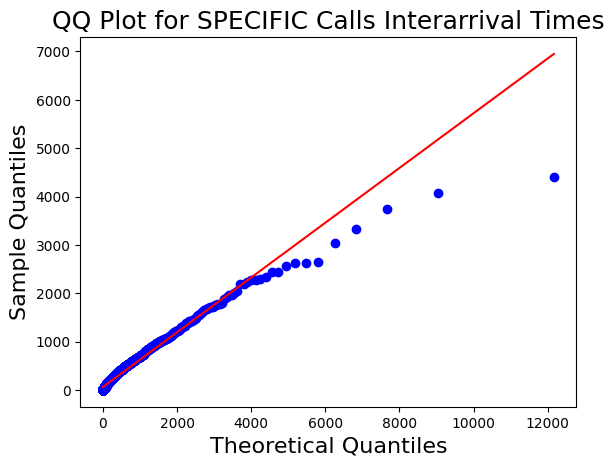

In [74]:
qq_plot_lognorm(cc_specific_df_nozero['interarrival_time'], 'QQ Plot for SPECIFIC Calls Interarrival Times')

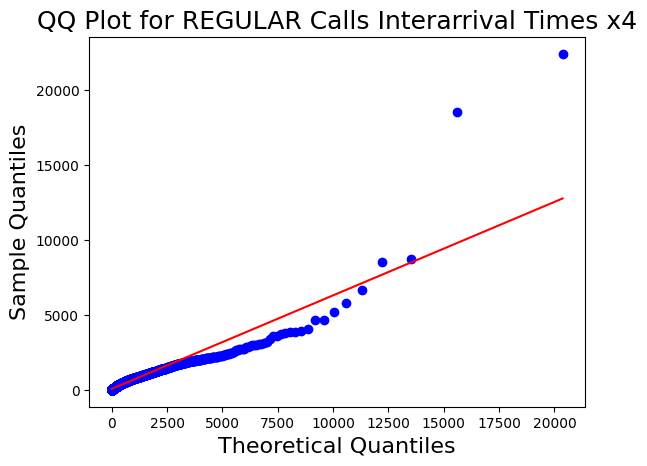

In [75]:
# QQ plots for interarrival times x4
qq_plot_lognorm(cc_regular_df_nozero['interarrival_time_x4'], 'QQ Plot for REGULAR Calls Interarrival Times x4')

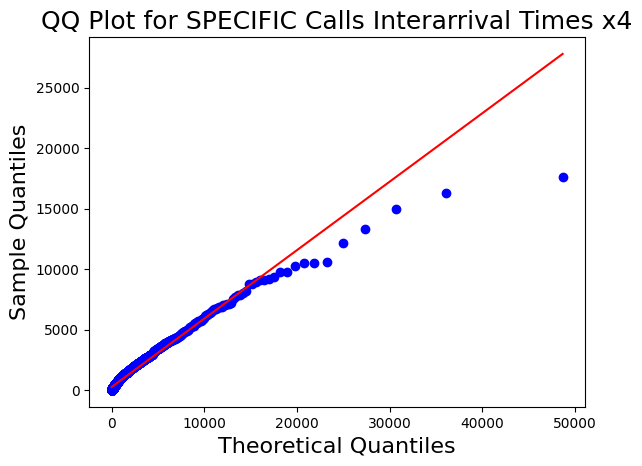

In [76]:
qq_plot_lognorm(cc_specific_df_nozero['interarrival_time_x4'], 'QQ Plot for SPECIFIC Calls Interarrival Times x4')

So the scaled interarrival resulted in trivially exact same distribution

We will decide to use lognorm and ignoring 0 interarrival values, since the record are small (1%) anyways

### Lets do the same on service time

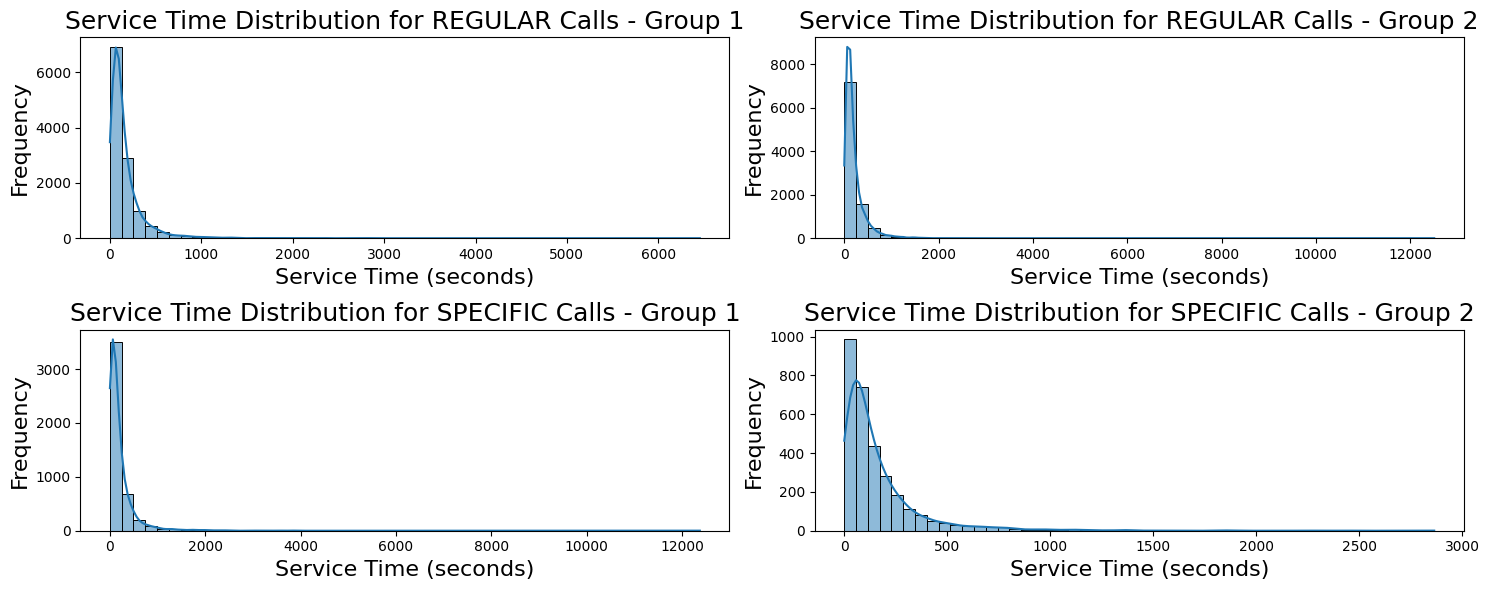

In [77]:
# Plot service time distributions for both call types and server groups
ct = ['REGULAR', 'SPECIFIC']
agents = ['1', '2']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 6))
for i, call_type in enumerate(ct):
    for j, agent in enumerate(agents):
        ax = axes[i, j]
        sns.histplot(cc_final_df[(cc_final_df['type_group'] == call_type) & (cc_final_df['group'] == agent)]['ser_time'], bins=50, kde=True, ax=ax)
        ax.set_title(f'Service Time Distribution for {call_type} Calls - Group {agent}')
        ax.set_xlabel('Service Time (seconds)')
        ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()


In [78]:
result_server_group = {}
for (group_value, type_group), group_df in cc_final_df.groupby(['group', 'type_group']):
    ser_time = group_df['ser_time']
    result_server_group[(group_value, type_group)] = ks_test_distributions_df(ser_time)
    print(f"{group_value} - {type_group}:\n", result_server_group[(group_value, type_group)], "\n")

1 - REGULAR:
              D-statistic       p-value  reject_null   best_fit
exponential     0.684892  0.000000e+00         True  lognormal
gamma           0.979155  0.000000e+00         True  lognormal
lognormal       0.043024  1.926895e-19         True  lognormal
weibull         0.374728  0.000000e+00         True  lognormal 

1 - SPECIFIC:
              D-statistic   p-value  reject_null   best_fit
exponential     0.711304  0.000000         True  lognormal
gamma           0.980192  0.000000         True  lognormal
lognormal       0.038484  0.000002         True  lognormal
weibull         0.402507  0.000000         True  lognormal 

2 - REGULAR:
              D-statistic       p-value  reject_null   best_fit
exponential     0.687493  0.000000e+00         True  lognormal
gamma           0.998215  0.000000e+00         True  lognormal
lognormal       0.031495  1.142835e-08         True  lognormal
weibull         0.613919  0.000000e+00         True  lognormal 

2 - SPECIFIC:
            

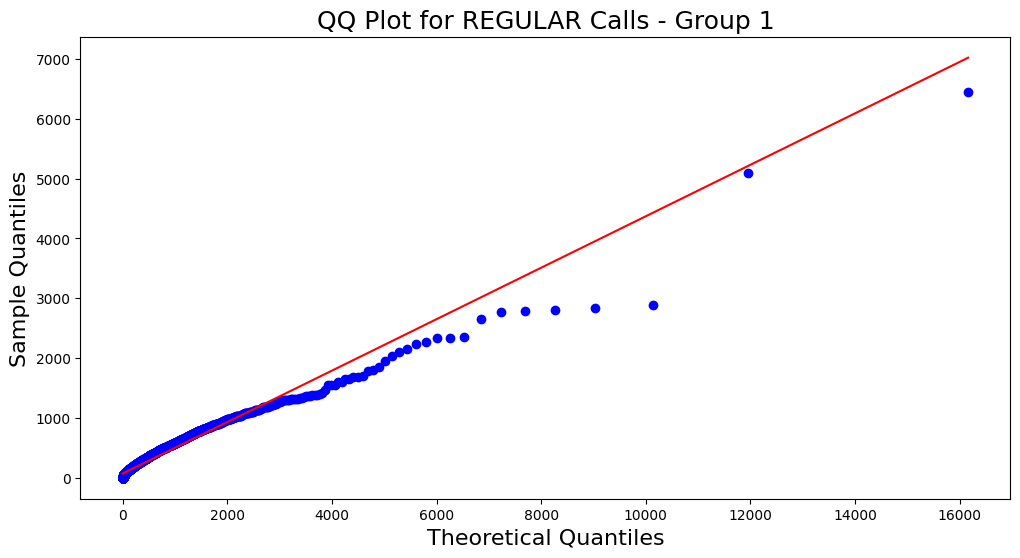

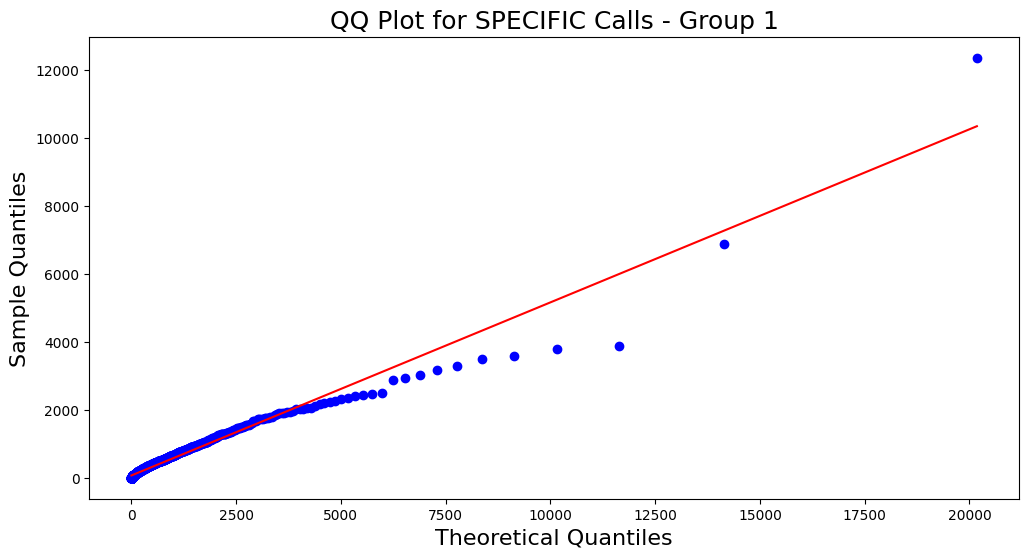

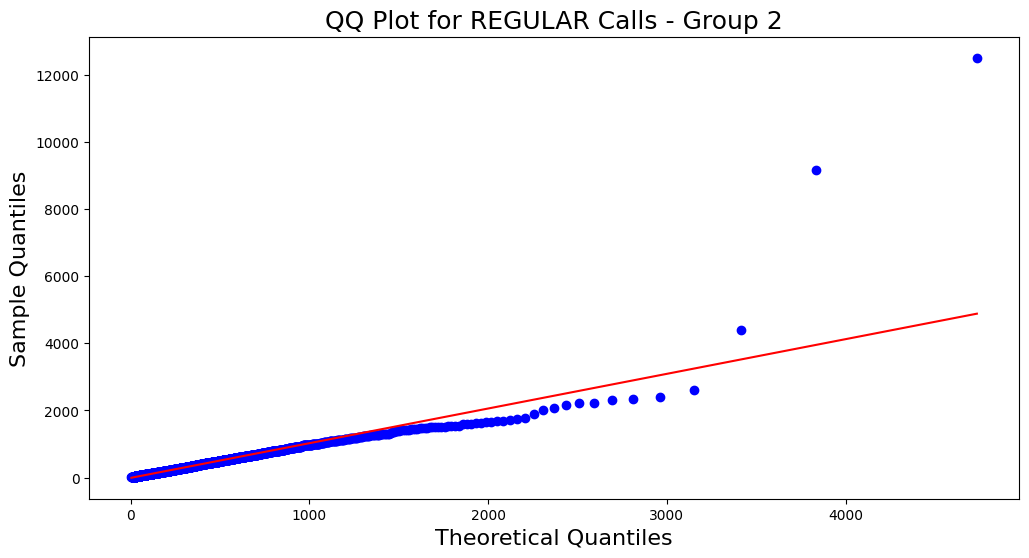

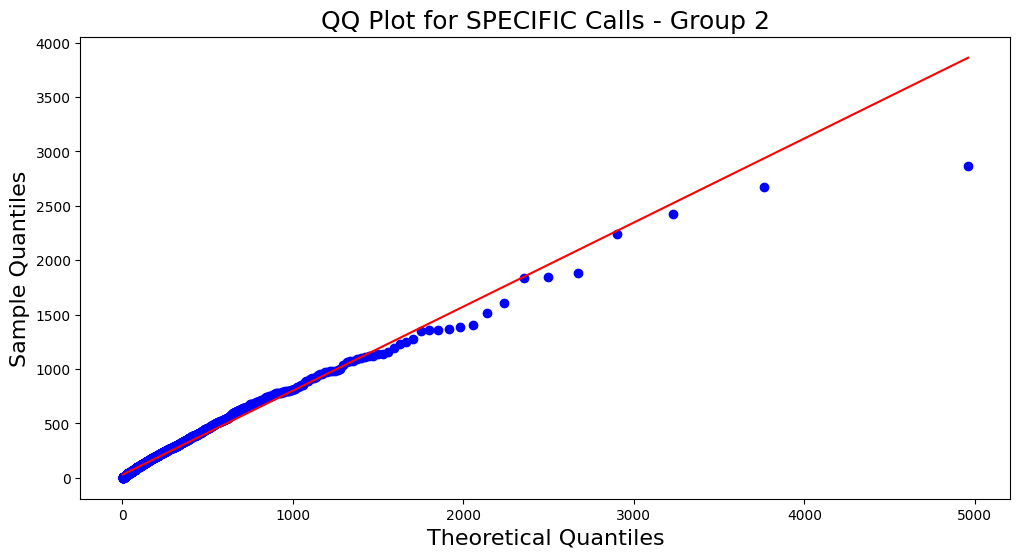

In [79]:
# Plot the service time QQ plots
for (server_group, type_group), group_df in cc_final_df.groupby(['group', 'type_group']):
    plt.figure(figsize=(12, 6))
    qq_plot_lognorm(group_df['ser_time'], f'QQ Plot for {type_group} Calls - Group {server_group}')
    plt.show()

In [80]:
# Collect the best fitting parameters for each results
best_fit_service_params = {}
for (server_group, type_group), df in result_server_group.items():
    best_fit = df['best_fit'].iloc[0]
    if best_fit == 'exponential':
        params = (df.loc['exponential', 'D-statistic'],)
    elif best_fit == 'gamma':
        params = stats.gamma.fit(cc_final_df[(cc_final_df['group'] == server_group) & (cc_final_df['type_group'] == type_group)]['ser_time'])
    elif best_fit == 'lognormal':
        params = stats.lognorm.fit(cc_final_df[(cc_final_df['group'] == server_group) & (cc_final_df['type_group'] == type_group)]['ser_time'])
    else:
        params = None
    best_fit_service_params[(server_group, type_group)] = params
    
print("Best fitting service time distribution parameters for each group and call type:")
for (server_group, type_group), params in best_fit_service_params.items():
    print(f"{server_group} - {type_group}: {params}")

Best fitting service time distribution parameters for each group and call type:
1 - REGULAR: (np.float64(0.8730464230836799), -18.81216413263904, np.float64(125.46378302666686))
1 - SPECIFIC: (np.float64(1.214960359497789), -6.43006717763892, np.float64(107.29065148469789))
2 - REGULAR: (np.float64(0.8338496982819321), -8.97654648869145, np.float64(150.28787524753483))
2 - SPECIFIC: (np.float64(1.025678942745753), -4.806412598886724, np.float64(101.20889024937449))


In [81]:
shape_regular, loc_regular, scale_regular = stats.lognorm.fit(cc_regular_df_nozero['interarrival_time'])
shape_specific, loc_specific, scale_specific = stats.lognorm.fit(cc_specific_df_nozero['interarrival_time'])
shape_regular_x4, loc_regular_x4, scale_regular_x4 = stats.lognorm.fit(cc_regular_df_nozero['interarrival_time_x4'])
shape_specific_x4, loc_specific_x4, scale_specific_x4 = stats.lognorm.fit(cc_specific_df_nozero['interarrival_time_x4'])

In [82]:
# Place the params in a dataframe
best_fit_params_df = pd.DataFrame.from_dict(best_fit_service_params, orient='index', columns=['shape', 'loc', 'scale'])

best_fit_params_df = best_fit_params_df.reset_index().rename(columns={'index': 'param_name'})

# Add the shape, loc, and scale for regular and specific calls
best_fit_interarrival_df = pd.DataFrame([
    {'param_name': 'REGULAR', 'shape': shape_regular, 'loc': loc_regular, 'scale': scale_regular},
    {'param_name': 'SPECIFIC', 'shape': shape_specific, 'loc': loc_specific, 'scale': scale_specific},
    {'param_name': 'REGULAR_x4', 'shape': shape_regular_x4, 'loc': loc_regular_x4, 'scale': scale_regular_x4},
    {'param_name': 'SPECIFIC_x4', 'shape': shape_specific_x4, 'loc': loc_specific_x4, 'scale': scale_specific_x4}
])

# Concatenate the best fit parameters for service times and interarrival times
best_fit_params_df = pd.concat([best_fit_params_df, best_fit_interarrival_df], ignore_index=True)

best_fit_params_df


,param_name,shape,loc,scale
0,"(1, REGULAR)",0.873046,-18.812164,125.463783
1,"(1, SPECIFIC)",1.214960,-6.430067,107.290651
2,"(2, REGULAR)",0.833850,-8.976546,150.287875
3,"(2, SPECIFIC)",1.025679,-4.806413,101.208890
4,REGULAR,1.050439,-2.846758,42.902664
5,SPECIFIC,1.133671,-5.260939,104.596529
6,REGULAR_x4,1.050439,-11.387034,171.610656
7,SPECIFIC_x4,1.133671,-21.043756,418.386116


In [83]:
# Calculate mu and sigma for lognormal distribution from the best fitting parameters
lognorm_params = {}
for _, row in best_fit_params_df.iterrows():
    param_name = row['param_name']
    scale = row['scale']
    shape = row['shape']
    mu = np.log(scale)
    sigma = np.sqrt(np.log(1 + (shape ** 2) / (scale ** 2)))
    loc = row['loc'] if 'loc' in row else 0  # Handle cases where loc is not present
    lognorm_params[param_name] = {'mu': mu, 'sigma': sigma, 'loc': loc}
    
lognorm_params_df = pd.DataFrame.from_dict(lognorm_params, orient='index').reset_index().rename(columns={'index': 'param_name'})

lognorm_params_df

,param_name,mu,sigma,loc
0,"(1, REGULAR)",4.832017,0.006958,-18.812164
1,"(1, SPECIFIC)",4.675542,0.011324,-6.430067
2,"(2, REGULAR)",5.012553,0.005548,-8.976546
3,"(2, SPECIFIC)",4.617187,0.010134,-4.806413
4,REGULAR,3.758934,0.024481,-2.846758
5,SPECIFIC,4.650110,0.010838,-5.260939
6,REGULAR_x4,5.145228,0.006121,-11.387034
7,SPECIFIC_x4,6.036405,0.002710,-21.043756


Since the `loc` is not zero, this mu and sigma is actually an approximation

In [84]:
# Save fit and lognorm param DataFrames to pickle files
best_fit_params_df.to_pickle('pickles/anonbank_best_fit_params.pkl')
lognorm_params_df.to_pickle('pickles/anonbank_lognorm_params.pkl')

### Second Option

Calculate service rate per agent, and accumulate them per group.

In [134]:
cc_agent_service_df = cc_final_df[['server', 'ser_time', 'type_group', 'group']].copy()

agent_summary = cc_agent_service_df.groupby(['group', 'server', 'type_group']).agg({'ser_time': ['mean', 'std', 'count']}).reset_index()

agent_summary

group   server type_group    ser_time                   
                                    mean          std count
0      1      AVI    REGULAR  138.247344   145.649227  1977
1      1      AVI   SPECIFIC  120.717633   135.251884   811
2      1      ELI    REGULAR  361.764706   343.118334    17
3      1      ELI   SPECIFIC  433.777778   497.246096   378
4      1   GELBER    REGULAR  180.160448   262.136183   268
5      1   GELBER   SPECIFIC  164.847458   401.436004   118
6      1     GILI    REGULAR  141.678233   144.984517   317
7      1     GILI   SPECIFIC  141.630000   230.717487   100
8      1    KAZAV    REGULAR  165.104244   194.180201  1343
9      1    KAZAV   SPECIFIC  152.035533   151.969425   394
10     1     MEIR    REGULAR  194.906667   182.841179    75
11     1     MEIR   SPECIFIC  225.211538   276.616131    52
12     1   MORIAH    REGULAR  135.926427   213.987536  1699
13     1   MORIAH   SPECIFIC  150.481742   235.680968   712
14     1    NAAMA    REGULAR  181.256776   199.986056   701
15     1    NAAMA   SPECIFIC  190.857143   192.401798   147
16     1   SHARON    REGULAR  141.068376   153.962810  1872
17     1   SHARON   SPECIFIC  137.796992   161.190141   665
18     1   SHLOMO    REGULAR  159.908163   122.779837    98
19     1   SHLOMO   SPECIFIC  446.838710  1227.756656    31
20     1     TOVA    REGULAR  167.613037   202.835777  1442
21     1     TOVA   SPECIFIC  165.768182   193.359429   440
22     1    YIFAT    REGULAR  205.054817   294.589410   602
23     1    YIFAT   SPECIFIC  392.476471  1067.430644   170
24     1     YITZ    REGULAR  244.134901   352.643644   808
25     1     YITZ   SPECIFIC  395.030151   586.108351   199
26     1   ZOHARI    REGULAR  240.498322   230.430985   596
27     1   ZOHARI   SPECIFIC  327.569191   338.140046   383
28     2     ANAT    REGULAR  199.019017   214.615148  1262
29     2     ANAT   SPECIFIC  180.872659   195.683203   267
30     2   AVIDAN    REGULAR  188.343137   172.830535   204
31     2   AVIDAN   SPECIFIC  158.813559   169.145007   118
32     2     AVNI    REGULAR  246.886092   236.618605  1589
33     2     AVNI   SPECIFIC  170.300797   178.494008   502
34     2    BASCH    REGULAR  189.517941   215.609985   641
35     2    BASCH   SPECIFIC  157.373272   181.545331   217
36     2  BENSION    REGULAR  127.363563   120.440324  1246
37     2  BENSION   SPECIFIC   97.798165   109.976698   436
38     2   DARMON    REGULAR  275.068966   276.483788   232
39     2   DARMON   SPECIFIC  268.532468   290.000072    77
40     2    DORIT    REGULAR  216.832812   527.804137   640
41     2    DORIT   SPECIFIC  192.779817   184.222307   109
42     2   PINHAS    REGULAR  413.367816   554.414092   174
43     2   PINHAS   SPECIFIC  257.866935   391.327868   248
44     2     ROTH    REGULAR  220.586985   317.436640  1506
45     2     ROTH   SPECIFIC  166.212308   244.807044   325
46     2   STEREN    REGULAR  206.561886   196.284346  1018
47     2   STEREN   SPECIFIC  149.958025   174.320692   405
48     2    VICKY    REGULAR  199.558006   221.202683  1043
49     2    VICKY   SPECIFIC  146.551075   178.864975   372

In [135]:
# Calculate the group mean service time for each type
agent_summary['service_rate'] = 1 / agent_summary['ser_time']['mean']

agent_summary

group   server type_group    ser_time                    service_rate
                                    mean          std count             
0      1      AVI    REGULAR  138.247344   145.649227  1977     0.007233
1      1      AVI   SPECIFIC  120.717633   135.251884   811     0.008284
2      1      ELI    REGULAR  361.764706   343.118334    17     0.002764
3      1      ELI   SPECIFIC  433.777778   497.246096   378     0.002305
4      1   GELBER    REGULAR  180.160448   262.136183   268     0.005551
5      1   GELBER   SPECIFIC  164.847458   401.436004   118     0.006066
6      1     GILI    REGULAR  141.678233   144.984517   317     0.007058
7      1     GILI   SPECIFIC  141.630000   230.717487   100     0.007061
8      1    KAZAV    REGULAR  165.104244   194.180201  1343     0.006057
9      1    KAZAV   SPECIFIC  152.035533   151.969425   394     0.006577
10     1     MEIR    REGULAR  194.906667   182.841179    75     0.005131
11     1     MEIR   SPECIFIC  225.211538   276.616131    52     0.004440
12     1   MORIAH    REGULAR  135.926427   213.987536  1699     0.007357
13     1   MORIAH   SPECIFIC  150.481742   235.680968   712     0.006645
14     1    NAAMA    REGULAR  181.256776   199.986056   701     0.005517
15     1    NAAMA   SPECIFIC  190.857143   192.401798   147     0.005240
16     1   SHARON    REGULAR  141.068376   153.962810  1872     0.007089
17     1   SHARON   SPECIFIC  137.796992   161.190141   665     0.007257
18     1   SHLOMO    REGULAR  159.908163   122.779837    98     0.006254
19     1   SHLOMO   SPECIFIC  446.838710  1227.756656    31     0.002238
20     1     TOVA    REGULAR  167.613037   202.835777  1442     0.005966
21     1     TOVA   SPECIFIC  165.768182   193.359429   440     0.006033
22     1    YIFAT    REGULAR  205.054817   294.589410   602     0.004877
23     1    YIFAT   SPECIFIC  392.476471  1067.430644   170     0.002548
24     1     YITZ    REGULAR  244.134901   352.643644   808     0.004096
25     1     YITZ   SPECIFIC  395.030151   586.108351   199     0.002531
26     1   ZOHARI    REGULAR  240.498322   230.430985   596     0.004158
27     1   ZOHARI   SPECIFIC  327.569191   338.140046   383     0.003053
28     2     ANAT    REGULAR  199.019017   214.615148  1262     0.005025
29     2     ANAT   SPECIFIC  180.872659   195.683203   267     0.005529
30     2   AVIDAN    REGULAR  188.343137   172.830535   204     0.005309
31     2   AVIDAN   SPECIFIC  158.813559   169.145007   118     0.006297
32     2     AVNI    REGULAR  246.886092   236.618605  1589     0.004050
33     2     AVNI   SPECIFIC  170.300797   178.494008   502     0.005872
34     2    BASCH    REGULAR  189.517941   215.609985   641     0.005277
35     2    BASCH   SPECIFIC  157.373272   181.545331   217     0.006354
36     2  BENSION    REGULAR  127.363563   120.440324  1246     0.007852
37     2  BENSION   SPECIFIC   97.798165   109.976698   436     0.010225
38     2   DARMON    REGULAR  275.068966   276.483788   232     0.003635
39     2   DARMON   SPECIFIC  268.532468   290.000072    77     0.003724
40     2    DORIT    REGULAR  216.832812   527.804137   640     0.004612
41     2    DORIT   SPECIFIC  192.779817   184.222307   109     0.005187
42     2   PINHAS    REGULAR  413.367816   554.414092   174     0.002419
43     2   PINHAS   SPECIFIC  257.866935   391.327868   248     0.003878
44     2     ROTH    REGULAR  220.586985   317.436640  1506     0.004533
45     2     ROTH   SPECIFIC  166.212308   244.807044   325     0.006016
46     2   STEREN    REGULAR  206.561886   196.284346  1018     0.004841
47     2   STEREN   SPECIFIC  149.958025   174.320692   405     0.006669
48     2    VICKY    REGULAR  199.558006   221.202683  1043     0.005011
49     2    VICKY   SPECIFIC  146.551075   178.864975   372     0.006824

In [136]:
ser_rate_summary = agent_summary.groupby(['group', 'type_group'])['service_rate'].sum().reset_index()

ser_rate_summary['mean_service_time'] = 1 / ser_rate_summary['service_rate']

ser_rate_summary

,group,type_group,service_rate,mean_service_time
0,1,REGULAR,0.079107,12.641068
1,1,SPECIFIC,0.070278,14.229164
2,2,REGULAR,0.052565,19.024178
3,2,SPECIFIC,0.066575,15.020757


Now we also need the std

In [137]:
agent_summary['weight'] = agent_summary['service_rate'] / agent_summary.groupby(['group','type_group'])['service_rate'].transform('sum')
agent_summary['mixture_mean'] = agent_summary['ser_time']['mean'] * agent_summary['weight']

agent_summary

group   server type_group    ser_time                    service_rate  \
                                    mean          std count                
0      1      AVI    REGULAR  138.247344   145.649227  1977     0.007233   
1      1      AVI   SPECIFIC  120.717633   135.251884   811     0.008284   
2      1      ELI    REGULAR  361.764706   343.118334    17     0.002764   
3      1      ELI   SPECIFIC  433.777778   497.246096   378     0.002305   
4      1   GELBER    REGULAR  180.160448   262.136183   268     0.005551   
5      1   GELBER   SPECIFIC  164.847458   401.436004   118     0.006066   
6      1     GILI    REGULAR  141.678233   144.984517   317     0.007058   
7      1     GILI   SPECIFIC  141.630000   230.717487   100     0.007061   
8      1    KAZAV    REGULAR  165.104244   194.180201  1343     0.006057   
9      1    KAZAV   SPECIFIC  152.035533   151.969425   394     0.006577   
10     1     MEIR    REGULAR  194.906667   182.841179    75     0.005131   
11     1     MEIR   SPECIFIC  225.211538   276.616131    52     0.004440   
12     1   MORIAH    REGULAR  135.926427   213.987536  1699     0.007357   
13     1   MORIAH   SPECIFIC  150.481742   235.680968   712     0.006645   
14     1    NAAMA    REGULAR  181.256776   199.986056   701     0.005517   
15     1    NAAMA   SPECIFIC  190.857143   192.401798   147     0.005240   
16     1   SHARON    REGULAR  141.068376   153.962810  1872     0.007089   
17     1   SHARON   SPECIFIC  137.796992   161.190141   665     0.007257   
18     1   SHLOMO    REGULAR  159.908163   122.779837    98     0.006254   
19     1   SHLOMO   SPECIFIC  446.838710  1227.756656    31     0.002238   
20     1     TOVA    REGULAR  167.613037   202.835777  1442     0.005966   
21     1     TOVA   SPECIFIC  165.768182   193.359429   440     0.006033   
22     1    YIFAT    REGULAR  205.054817   294.589410   602     0.004877   
23     1    YIFAT   SPECIFIC  392.476471  1067.430644   170     0.002548   
24     1     YITZ    REGULAR  244.134901   352.643644   808     0.004096   
25     1     YITZ   SPECIFIC  395.030151   586.108351   199     0.002531   
26     1   ZOHARI    REGULAR  240.498322   230.430985   596     0.004158   
27     1   ZOHARI   SPECIFIC  327.569191   338.140046   383     0.003053   
28     2     ANAT    REGULAR  199.019017   214.615148  1262     0.005025   
29     2     ANAT   SPECIFIC  180.872659   195.683203   267     0.005529   
30     2   AVIDAN    REGULAR  188.343137   172.830535   204     0.005309   
31     2   AVIDAN   SPECIFIC  158.813559   169.145007   118     0.006297   
32     2     AVNI    REGULAR  246.886092   236.618605  1589     0.004050   
33     2     AVNI   SPECIFIC  170.300797   178.494008   502     0.005872   
34     2    BASCH    REGULAR  189.517941   215.609985   641     0.005277   
35     2    BASCH   SPECIFIC  157.373272   181.545331   217     0.006354   
36     2  BENSION    REGULAR  127.363563   120.440324  1246     0.007852   
37     2  BENSION   SPECIFIC   97.798165   109.976698   436     0.010225   
38     2   DARMON    REGULAR  275.068966   276.483788   232     0.003635   
39     2   DARMON   SPECIFIC  268.532468   290.000072    77     0.003724   
40     2    DORIT    REGULAR  216.832812   527.804137   640     0.004612   
41     2    DORIT   SPECIFIC  192.779817   184.222307   109     0.005187   
42     2   PINHAS    REGULAR  413.367816   554.414092   174     0.002419   
43     2   PINHAS   SPECIFIC  257.866935   391.327868   248     0.003878   
44     2     ROTH    REGULAR  220.586985   317.436640  1506     0.004533   
45     2     ROTH   SPECIFIC  166.212308   244.807044   325     0.006016   
46     2   STEREN    REGULAR  206.561886   196.284346  1018     0.004841   
47     2   STEREN   SPECIFIC  149.958025   174.320692   405     0.006669   
48     2    VICKY    REGULAR  199.558006   221.202683  1043     0.005011   
49     2    VICKY   SPECIFIC  146.551075   178.864975   372     0.006824   

      weight mixture_mean  
                      

In [138]:
# Group variance
groups = ['1','2']
type_groups = ['REGULAR','SPECIFIC']

variances = {}

for group in groups:
    for tp in type_groups:
        mask = (agent_summary['group'] == group) & (agent_summary['type_group'] == tp)
        var = 0
        for _, row in agent_summary[mask].iterrows():
            variance = row['ser_time']['std'] ** 2
            mean_diff_squared = (row['ser_time']['mean'] - row['mixture_mean']) ** 2  # mixture_mean is μ_group
            var += row['weight'] * (variance + mean_diff_squared)
        variances[(group, tp)] = var

variances

{('1',
  'REGULAR'):     75129.083477
 Name: 0, dtype: object,
 ('1',
  'SPECIFIC'):     200629.413862
 Name: 1, dtype: object,
 ('2',
  'REGULAR'):     118984.130672
 Name: 28, dtype: object,
 ('2',
  'SPECIFIC'):     66215.46193
 Name: 29, dtype: object}

In [139]:
# Calculate std from variance

# Calculate std from variance

stds = {key: np.sqrt(value.values[0]) if hasattr(value, 'values') else np.sqrt(value) for key, value in variances.items()}

stds

{('1', 'REGULAR'): np.float64(274.09685054233046),
 ('1', 'SPECIFIC'): np.float64(447.916748807343),
 ('2', 'REGULAR'): np.float64(344.9407640049321),
 ('2', 'SPECIFIC'): np.float64(257.32365209990894)}

In [140]:
# Assign variance from the variances dict to each row in ser_rate_summary
ser_rate_summary['variance'] = ser_rate_summary.apply(
    lambda row: float(variances[(str(row['group']), row['type_group'])]), axis=1
)

ser_rate_summary['std'] = ser_rate_summary['variance'].apply(np.sqrt)

ser_rate_summary

C:\Users\irfan\AppData\Local\Temp\ipykernel_24624\3354943895.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  lambda row: float(variances[(str(row['group']), row['type_group'])]), axis=1


,group,type_group,service_rate,mean_service_time,variance,std
0,1,REGULAR,0.079107,12.641068,75129.083477,274.096851
1,1,SPECIFIC,0.070278,14.229164,200629.413862,447.916749
2,2,REGULAR,0.052565,19.024178,118984.130672,344.940764
3,2,SPECIFIC,0.066575,15.020757,66215.461930,257.323652


In [141]:
# Save to pickle file
ser_rate_summary.to_pickle('pickles/anonbank_service_rate.pkl')

Let's try using whole dataset interarrivals

In [168]:
cc_new_df = pd.read_csv('AnonymousBank/July1999.txt', sep='\t')

cc_whole_df = cc_new_df.copy()

C:\Users\irfan\AppData\Local\Temp\ipykernel_24624\2605474433.py:1: DtypeWarning: Columns (3,5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  cc_new_df = pd.read_csv('AnonymousBank/July1999.txt', sep='\t')


In [169]:
cc_whole_df[cc_whole_df['type'].str.len() != 2]

,vru+line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server
9142,AA0108,3364,0,0 TT,990717,2:17:57,2:18:09,12,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,NaN
9236,AA0108,3458,0,0 TT,990729,9:16:11,9:16:27,16,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,NaN
12078,AA0111,3590,0,0 TT,990703,13:56:19,13:56:22,3,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,NaN
15210,AA0116,6178,0,0 IN,990706,12:02:11,12:02:34,23,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,NaN
15388,AA0116,6357,0,0 IN,990719,19:26:18,19:26:24,6,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,NaN


In [170]:
# Remove rows with broken parsing
cc_whole_df = cc_whole_df[cc_whole_df['type'].str.len() == 2]

In [171]:
# Change date column types to datetime
cc_whole_df['date'] = pd.to_datetime(cc_whole_df['date'], format='%y%m%d')

# Change time columns to datetime
cc_whole_df['vru_entry'] = pd.to_datetime(cc_whole_df['date'].astype(str) + ' ' + cc_whole_df['vru_entry'], format='%Y-%m-%d %H:%M:%S')

# Remove rows with entry time before 7 AM or after midnight
cc_whole_df = cc_whole_df[(cc_whole_df['vru_entry'].dt.hour >= 7) & (cc_whole_df['vru_entry'].dt.hour < 24)]

# Only keep call_id, type, date, and vru_entry columns
cc_whole_df = cc_whole_df[['call_id', 'type', 'date', 'vru_entry']]

# Display the first few rows of the cleaned DataFrame
cc_whole_df.head(10)

,call_id,type,date,vru_entry
2,41888,PS,1999-07-01,1999-07-01 07:30:27
3,41889,PS,1999-07-01,1999-07-01 07:49:32
4,41890,PS,1999-07-01,1999-07-01 08:03:56
5,41891,PS,1999-07-01,1999-07-01 08:22:12
6,41892,PS,1999-07-01,1999-07-01 08:32:24
7,41893,PS,1999-07-01,1999-07-01 08:41:51
8,41894,PS,1999-07-01,1999-07-01 08:51:26
9,41895,PS,1999-07-01,1999-07-01 08:58:18
10,41896,PS,1999-07-01,1999-07-01 09:09:06
11,41897,PS,1999-07-01,1999-07-01 10:52:15


In [172]:
cc_whole_regular_df = cc_whole_df[cc_whole_df['type'] == 'PS'].copy().sort_values(by='vru_entry')
cc_whole_specific_df = cc_whole_df[cc_whole_df['type'] != 'PS'].copy().sort_values(by='vru_entry')

cc_whole_regular_df['interarrival_time'] = (
    cc_whole_regular_df.groupby('date')['vru_entry'].diff().dt.total_seconds()
    )
cc_whole_specific_df['interarrival_time'] = (
    cc_whole_specific_df.groupby('date')['vru_entry'].diff().dt.total_seconds()
    )

cc_whole_regular_df['interarrival_time'].describe(), cc_whole_specific_df['interarrival_time'].describe()

(count    26924.000000
 mean        63.550847
 std        261.535732
 min          0.000000
 25%         13.000000
 50%         34.000000
 75%         71.000000
 max      16926.000000
 Name: interarrival_time, dtype: float64,
 count    11580.000000
 mean       143.744560
 std        503.478522
 min          0.000000
 25%         27.000000
 50%         68.000000
 75%        152.000000
 max      33969.000000
 Name: interarrival_time, dtype: float64)

In [174]:
def mean_shifted_lognormal(mu, sigma, loc):
    """
    Calculate mean of shifted lognormal distribution:
    E[X] = exp(mu + sigma^2 / 2) + loc
    """
    return np.exp(mu + (sigma**2) / 2) + loc

In [176]:
# Remove NA and zero values in interarrival times
cc_whole_regular_df_nozero = cc_whole_regular_df.dropna(subset=['interarrival_time'])
cc_whole_specific_df_nozero = cc_whole_specific_df.dropna(subset=['interarrival_time'])

cc_whole_regular_df_nozero = cc_whole_regular_df_nozero[cc_whole_regular_df_nozero['interarrival_time'] > 0]
cc_whole_specific_df_nozero = cc_whole_specific_df_nozero[cc_whole_specific_df_nozero['interarrival_time'] > 0]

# Fit with lognormal distribution
shape_regular_whole, loc_regular_whole, scale_regular_whole = stats.lognorm.fit(cc_whole_regular_df_nozero['interarrival_time'])
shape_specific_whole, loc_specific_whole, scale_specific_whole = stats.lognorm.fit(cc_whole_specific_df_nozero['interarrival_time'])

# Calculate mu and sigma for lognormal distribution from the best fitting parameters
mu_regular_whole = np.log(scale_regular_whole)
sigma_regular_whole = np.sqrt(np.log(1 + (shape_regular_whole ** 2) / (scale_regular_whole ** 2)))
mu_specific_whole = np.log(scale_specific_whole)
sigma_specific_whole = np.sqrt(np.log(1 + (shape_specific_whole ** 2) / (scale_specific_whole ** 2)))

# Calculate mean of shifted lognormal distribution
mean_regular_whole = mean_shifted_lognormal(mu_regular_whole, sigma_regular_whole, loc_regular_whole)
mean_specific_whole = mean_shifted_lognormal(mu_specific_whole, sigma_specific_whole, loc_specific_whole)

print(f"Mean interarrival time for REGULAR calls: {mean_regular_whole} seconds")
print(f"Mean interarrival time for SPECIFIC calls: {mean_specific_whole} seconds")

Mean interarrival time for REGULAR calls: 31.059721854955743 seconds
Mean interarrival time for SPECIFIC calls: 64.67177466098556 seconds
